# Visual Question Answering - VQA

**Ton Duc Thang University**<br>
**Subject:** Deep Learning <br>
**Lecturer**: Assoc. Phd. Le Anh Cuong <br>
**Authors**:
1. 522H0134 - Nguyen Nhat Huy
2. 522H0099 - Doan Ngoc Bao <br>
**Refs**:<br>
* [Flickr8K Image Captioning using CNNs+LSTMs](https://www.kaggle.com/code/quadeer15sh/flickr8k-image-captioning-using-cnns-lstms)
* [Bristol-Myers Squibb – Molecular Translation](https://www.kaggle.com/competitions/bms-molecular-translation/discussion/223419)
* [VLSP_Visual Question Answering Vietnamese](https://www.kaggle.com/code/nhanvi/vlsp-visual-question-answering-vietnamese)
* [VQA Baseline (ResNet50 + BERT)](https://www.kaggle.com/code/hoangminhtran/vqa-baseline-resnet50-bert/notebook)
* [VQA_AIVN](https://www.kaggle.com/code/nguynkoi/vqa-aivn/notebook)


**Description**:


In [ ]:
# Chạy trong Colab để hiển thị nội dung trong một hộp văn bản
from IPython.display import display, Markdown

text = """
Dự án Giữa kỳ
Môn: Học sâu (Deep learning)

Bài toán: hãy xây dựng mô hình giải quyết bài toán sau:
Câu hỏi + bức ảnh (image) -> câu trả lời

1) Hãy xây dựng dữ liệu, hạn chế trên một miền dữ liệu và một bài toán hẹp nào đó để dữ liệu được tập trung (tránh hiện tượng dữ liệu thưa), tức là:
   - Hạn chế về loại ảnh: ví dụ chỉ ảnh về trái cây
   - Hạn chế về loại câu hỏi: ví dụ chỉ hỏi về số lượng và nhận dạng
   Có thể dùng LLMs để sinh dữ liệu, ví dụ:
   - Thu thập các ảnh
   - Dùng LLMs để tạo câu hỏi và câu trả lời

2) Xây dựng mô hình giải quyết bài toán này với các yêu cầu:
   - Sử dụng CNN để học đặc trưng của ảnh
   - Sử dụng LSTM để sinh output
   - Lưu ý: kết nối CNN và LSTM thành mô hình thống nhất
   - Thử nghiệm 2 tiếp cận: dùng pretrain models và train model từ đầu

Yêu cầu:
- Hiểu lý thuyết các mô hình
- Hiểu code, hiểu cách làm

Nộp bài:
1) Tất cả các thành viên trong nhóm phải hiểu tất cả các bài (tránh tình trạng phân công mỗi người làm 1 bài và người này không biết người kia làm gì)
2) Tất cả các thành viên trong nhóm đều phải nộp bài; ai không nộp bài sẽ bị 0 điểm
3) Bài nộp bao gồm file pdf chứa lý thuyết, thuyết minh bài toán và cách làm; và các file code;
"""

display(Markdown(f"```\n{text}\n```"))

```

Dự án Giữa kỳ
Môn: Học sâu (Deep learning)

Bài toán: hãy xây dựng mô hình giải quyết bài toán sau:
Câu hỏi + bức ảnh (image) -> câu trả lời

1) Hãy xây dựng dữ liệu, hạn chế trên một miền dữ liệu và một bài toán hẹp nào đó để dữ liệu được tập trung (tránh hiện tượng dữ liệu thưa), tức là:
   - Hạn chế về loại ảnh: ví dụ chỉ ảnh về trái cây
   - Hạn chế về loại câu hỏi: ví dụ chỉ hỏi về số lượng và nhận dạng
   Có thể dùng LLMs để sinh dữ liệu, ví dụ:
   - Thu thập các ảnh
   - Dùng LLMs để tạo câu hỏi và câu trả lời

2) Xây dựng mô hình giải quyết bài toán này với các yêu cầu:
   - Sử dụng CNN để học đặc trưng của ảnh
   - Sử dụng LSTM để sinh output
   - Lưu ý: kết nối CNN và LSTM thành mô hình thống nhất
   - Thử nghiệm 2 tiếp cận: dùng pretrain models và train model từ đầu

Yêu cầu:
- Hiểu lý thuyết các mô hình
- Hiểu code, hiểu cách làm

Nộp bài:
1) Tất cả các thành viên trong nhóm phải hiểu tất cả các bài (tránh tình trạng phân công mỗi người làm 1 bài và người này không biết người kia làm gì)
2) Tất cả các thành viên trong nhóm đều phải nộp bài; ai không nộp bài sẽ bị 0 điểm
3) Bài nộp bao gồm file pdf chứa lý thuyết, thuyết minh bài toán và cách làm; và các file code;

```

In [ ]:
import torch

if torch.cuda.is_available():
    print("✅ CUDA is available!")
    print(f"GPU: {torch.cuda.get_device_name(0)}")
else:
    print("❌ CUDA is NOT available.")

✅ CUDA is available!
GPU: Tesla T4


## Data Preparation

### Download and EDA

In [1]:
!pip install transformers torch torchvision pillow accelerate datasets nltk wikipedia-api

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 17.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 16.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 23.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 19.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 56.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 487.4/487.4 kB 36.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 13.5 MB/s eta 0:00:00


In [2]:
import os
import shutil
import kagglehub

# Tải dataset
dataset_path = kagglehub.dataset_download("iamsouravbanerjee/animal-image-dataset-90-different-animals")
destination_path = "/content/animal_dataset"

# Tạo thư mục đích nếu chưa tồn tại
if not os.path.exists(destination_path):
    os.makedirs(destination_path)

# Di chuyển tất cả file và thư mục vào /content/animal_dataset
for item in os.listdir(dataset_path):
    src_path = os.path.join(dataset_path, item)
    dst_path = os.path.join(destination_path, item)

    if os.path.isdir(src_path):
        shutil.move(src_path, dst_path)
    else:
        shutil.move(src_path, destination_path)

print(f"✅ Dataset đã được chuyển vào: {destination_path}")

# Kiểm tra danh sách file & thư mục sau khi di chuyển
print("📁 Danh sách file & thư mục sau khi di chuyển:", os.listdir(destination_path))

100%|██████████| 656M/656M [00:07<00:00, 90.8MB/s]

Extracting files...


✅ Dataset đã được chuyển vào: /content/animal_dataset
📁 Danh sách file & thư mục sau khi di chuyển: ['animals', 'name of the animals.txt']


In [ ]:
# Đọc nội dung file và hiển thị danh sách theo hàng dọc
txt_file_path = "/content/animal_dataset/name of the animals.txt"

if os.path.exists(txt_file_path):
    with open(txt_file_path, "r") as f:
        animal_names = [line.strip() for line in f.readlines()]

    print(f"📜 Danh sách {len(animal_names)} loài động vật trong dataset:\n")
    for animal in animal_names:
        print(animal)
else:
    print("⚠️ Không tìm thấy file name of the animals.txt!")

📜 Danh sách 90 loài động vật trong dataset:

antelope
badger
bat
bear
bee
beetle
bison
boar
butterfly
cat
caterpillar
chimpanzee
cockroach
cow
coyote
crab
crow
deer
dog
dolphin
donkey
dragonfly
duck
eagle
elephant
flamingo
fly
fox
goat
goldfish
goose
gorilla
grasshopper
hamster
hare
hedgehog
hippopotamus
hornbill
horse
hummingbird
hyena
jellyfish
kangaroo
koala
ladybugs
leopard
lion
lizard
lobster
mosquito
moth
mouse
octopus
okapi
orangutan
otter
owl
ox
oyster
panda
parrot
pelecaniformes
penguin
pig
pigeon
porcupine
possum
raccoon
rat
reindeer
rhinoceros
sandpiper
seahorse
seal
shark
sheep
snake
sparrow
squid
squirrel
starfish
swan
tiger
turkey
turtle
whale
wolf
wombat
woodpecker
zebra


In [3]:
import os
import glob
import random
import shutil
import matplotlib.pyplot as plt
import cv2

# Đường dẫn đến thư mục chứa ảnh động vật
dataset_dir = "/content/animal_dataset/animals/animals"

# Lấy danh sách tất cả thư mục (tên loài động vật)
animal_classes = sorted(os.listdir(dataset_dir))

# Lặp qua từng thư mục và đổi tên ảnh
for animal in animal_classes:
    animal_path = os.path.join(dataset_dir, animal)
    if os.path.isdir(animal_path):
        image_files = sorted(glob.glob(os.path.join(animal_path, "*.*")))  # Lấy tất cả file ảnh
        for idx, image_file in enumerate(image_files, start=1):
            ext = os.path.splitext(image_file)[1]  # Lấy đuôi file (.jpg, .png, ...)
            new_name = f"{animal}_{idx}{ext}"
            new_path = os.path.join(animal_path, new_name)
            os.rename(image_file, new_path)

print("✅ Đã đổi tên xong các ảnh trong dataset!")

✅ Đã đổi tên xong các ảnh trong dataset!


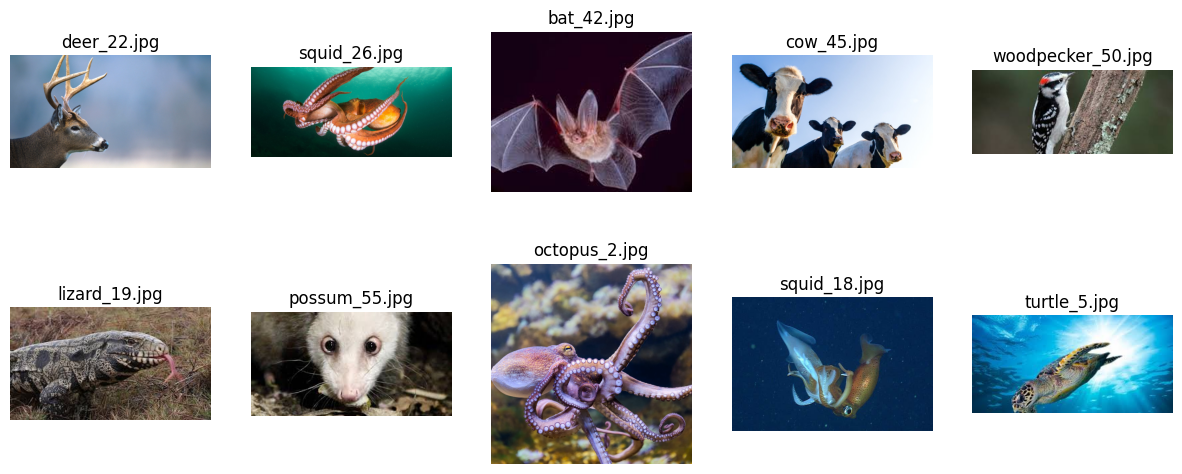

In [ ]:
# ======= 2. Hiển thị 10 ảnh ngẫu nhiên =======
# Tạo danh sách tất cả ảnh trong dataset
all_images = glob.glob(os.path.join(dataset_dir, "*/*.*"))  # Lấy tất cả ảnh từ mọi thư mục con

# Chọn 10 ảnh ngẫu nhiên
random_images = random.sample(all_images, 10)

# Hiển thị ảnh
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
for ax, img_path in zip(axes.flatten(), random_images):
    img = cv2.imread(img_path)[..., ::-1]  # Đọc ảnh và chuyển từ BGR -> RGB
    ax.imshow(img)
    ax.axis("off")
    ax.set_title(os.path.basename(img_path))  # Hiển thị tên file ảnh

plt.show()

### Integrate data

In [ ]:
import os

DATA_PATH = "animal_dataset"

def list_files_recursive(path, depth=0, max_depth=2):
    """
    Đệ quy liệt kê tất cả tệp trong thư mục và các thư mục con (tối đa max_depth cấp).
    """
    if depth > max_depth:
        return

    if not os.path.exists(path):
        print(f"❌ Không tìm thấy thư mục: {path}")
        return

    # Lấy danh sách tất cả thư mục và tệp
    entries = os.listdir(path)

    print(f"\n📂 [{depth}] Thư mục: {path}")
    print(f"🔹 Tổng số mục: {len(entries)}")

    # Liệt kê 10 mục đầu tiên để xem
    for entry in entries[:10]:  # Giới hạn 10 mục đầu
        full_path = os.path.join(path, entry)
        if os.path.isdir(full_path):
            print(f"📁 {entry}/ (Thư mục)")
            list_files_recursive(full_path, depth + 1, max_depth)  # Đệ quy vào thư mục con
        else:
            print(f"📄 {entry} (File)")

            # Nếu là file .txt, đọc thử nội dung
            if entry.endswith(".txt"):
                with open(full_path, "r", encoding="utf-8") as f:
                    content = f.read().strip()
                    print(f"   ➡️ Nội dung: {content[:100]}...")  # Chỉ in 100 ký tự đầu

# Gọi hàm liệt kê tệp từ thư mục chính
list_files_recursive(DATA_PATH)


📂 [0] Thư mục: animal_dataset
🔹 Tổng số mục: 2
📄 name of the animals.txt (File)
   ➡️ Nội dung: antelope
badger
bat
bear
bee
beetle
bison
boar
butterfly
cat
caterpillar
chimpanzee
cockroach
cow
co...
📁 animals/ (Thư mục)

📂 [1] Thư mục: animal_dataset/animals
🔹 Tổng số mục: 1
📁 animals/ (Thư mục)

📂 [2] Thư mục: animal_dataset/animals/animals
🔹 Tổng số mục: 90
📁 turtle/ (Thư mục)
📁 possum/ (Thư mục)
📁 orangutan/ (Thư mục)
📁 sparrow/ (Thư mục)
📁 rat/ (Thư mục)
📁 raccoon/ (Thư mục)
📁 lizard/ (Thư mục)
📁 goldfish/ (Thư mục)
📁 panda/ (Thư mục)
📁 bison/ (Thư mục)


In [ ]:
!pip install pyinaturalist

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.1/154.1 kB 13.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.4/61.4 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 kB 6.8 MB/s eta 0:00:00


Crawl More Data to 100 jpg for each animals

In [ ]:
from pyinaturalist import get_observations
import os
import requests

# Danh sách 90 loài động vật
animal_list = [
    "antelope", "badger", "bat", "bear", "bee", "beetle", "bison", "boar", "butterfly", "cat",
    "caterpillar", "chimpanzee", "cockroach", "cow", "coyote", "crab", "crow", "deer", "dog",
    "dolphin", "donkey", "dragonfly", "duck", "eagle", "elephant", "flamingo", "fly", "fox",
    "goat", "goldfish", "goose", "gorilla", "grasshopper", "hamster", "hare", "hedgehog",
    "hippopotamus", "hornbill", "horse", "hummingbird", "hyena", "jellyfish", "kangaroo",
    "koala", "ladybugs", "leopard", "lion", "lizard", "lobster", "mosquito", "moth", "mouse",
    "octopus", "okapi", "orangutan", "otter", "owl", "ox", "oyster", "panda", "parrot",
    "pelecaniformes", "penguin", "pig", "pigeon", "porcupine", "possum", "raccoon", "rat",
    "reindeer", "rhinoceros", "sandpiper", "seahorse", "seal", "shark", "sheep", "snake",
    "sparrow", "squid", "squirrel", "starfish", "swan", "tiger", "turkey", "turtle", "whale",
    "wolf", "wombat", "woodpecker", "zebra"
]

# Thư mục gốc để lưu ảnh
root_dir = "/content/animal_dataset/animals/animals"

# Hàm tải ảnh từ URL
def download_image(url, save_path):
    try:
        response = requests.get(url, stream=True)
        if response.status_code == 200:
            with open(save_path, 'wb') as f:
                f.write(response.content)
        return True
    except:
        return False

# Tải 40 ảnh từ iNaturalist cho mỗi loài
for animal in animal_list:
    save_dir = os.path.join(root_dir, animal)
    if not os.path.exists(save_dir):
        os.makedirs(save_dir)

    # Lấy dữ liệu từ iNaturalist
    observations = get_observations(
        taxon_name=animal,  # Tên loài
        per_page=40,        # Số ảnh cần lấy
        photos=True         # Chỉ lấy quan sát có ảnh
    )

    # Đếm số ảnh hiện có trong thư mục
    current_images = len([f for f in os.listdir(save_dir) if f.endswith('.jpg')])
    needed_images = 100 - current_images  # Số ảnh còn thiếu để đủ 100

    if needed_images <= 0:
        print(f"{animal} đã đủ 100 ảnh, bỏ qua.")
        continue

    # Tải ảnh
    count = 0
    for obs in observations['results']:
        if count >= needed_images:
            break
        for photo in obs['photos']:
            url = photo['url'].replace('square', 'medium')  # Lấy ảnh kích thước trung bình
            file_name = f"{animal}_{current_images + count + 1}.jpg"
            save_path = os.path.join(save_dir, file_name)
            if download_image(url, save_path):
                count += 1
                print(f"Đã tải {file_name}")

    print(f"Đã tải {count} ảnh cho {animal}")

Streaming output truncated to the last 5000 lines.
  adding: content/animal_dataset/animals/animals/bat/bat_58.jpg (deflated 11%)
  adding: content/animal_dataset/animals/animals/bat/bat_85.jpg (deflated 0%)
  adding: content/animal_dataset/animals/animals/bat/bat_75.jpg (deflated 0%)
  adding: content/animal_dataset/animals/animals/bat/bat_100.jpg (deflated 0%)
  adding: content/animal_dataset/animals/animals/bat/bat_64.jpg (deflated 0%)
  adding: content/animal_dataset/animals/animals/bat/bat_32.jpg (deflated 2%)
  adding: content/animal_dataset/animals/animals/bat/bat_44.jpg (deflated 0%)
  adding: content/animal_dataset/animals/animals/bat/bat_14.jpg (deflated 0%)
  adding: content/animal_dataset/animals/animals/bat/bat_40.jpg (deflated 13%)
  adding: content/animal_dataset/animals/animals/bat/bat_84.jpg (deflated 0%)
  adding: content/animal_dataset/animals/animals/starfish/ (stored 0%)
  adding: content/animal_dataset/animals/animals/starfish/starfish_60.jpg (deflated 0%)
  addin

Augmentation to 200 jpg for each animals

In [ ]:
!pip install albumentations

In [ ]:
import os
import cv2
import numpy as np
import albumentations as A
from tqdm import tqdm

# Danh sách 90 loài động vật
animal_list = [
    "antelope", "badger", "bat", "bear", "bee", "beetle", "bison", "boar", "butterfly", "cat",
    "caterpillar", "chimpanzee", "cockroach", "cow", "coyote", "crab", "crow", "deer", "dog",
    "dolphin", "donkey", "dragonfly", "duck", "eagle", "elephant", "flamingo", "fly", "fox",
    "goat", "goldfish", "goose", "gorilla", "grasshopper", "hamster", "hare", "hedgehog",
    "hippopotamus", "hornbill", "horse", "hummingbird", "hyena", "jellyfish", "kangaroo",
    "koala", "ladybugs", "leopard", "lion", "lizard", "lobster", "mosquito", "moth", "mouse",
    "octopus", "okapi", "orangutan", "otter", "owl", "ox", "oyster", "panda", "parrot",
    "pelecaniformes", "penguin", "pig", "pigeon", "porcupine", "possum", "raccoon", "rat",
    "reindeer", "rhinoceros", "sandpiper", "seahorse", "seal", "shark", "sheep", "snake",
    "sparrow", "squid", "squirrel", "starfish", "swan", "tiger", "turkey", "turtle", "whale",
    "wolf", "wombat", "woodpecker", "zebra"
]

# Thư mục gốc chứa ảnh
root_dir = "/content/animal_dataset/animals/animals"

# Định nghĩa các phương pháp augmentation
augmentations = [
    A.Rotate(limit=30, p=1.0),  # Xoay ảnh ±30 độ
    A.HorizontalFlip(p=1.0),     # Lật ngang
    A.VerticalFlip(p=1.0),       # Lật dọc
    A.RandomBrightnessContrast(brightness_limit=0.2, contrast_limit=0.2, p=1.0),  # Thay đổi độ sáng/tương phản
    A.GaussNoise(p=1.0),         # Thêm nhiễu Gaussian (bỏ var_limit để dùng mặc định)
    A.HueSaturationValue(hue_shift_limit=20, sat_shift_limit=30, val_shift_limit=20, p=1.0),  # Thay đổi màu sắc
    A.ShiftScaleRotate(shift_limit=0.1, scale_limit=0.1, rotate_limit=15, p=1.0),  # Dịch chuyển/phóng to/thu nhỏ/xoay
    A.Blur(blur_limit=3, p=1.0),  # Làm mờ
    A.RandomGamma(gamma_limit=(80, 120), p=1.0),  # Thay đổi gamma
]

# Hàm augmentation để tạo thêm 200 ảnh từ 1 ảnh gốc
def augment_image(image, save_dir, base_name, aug_idx_start, img_height, img_width):
    # Điều chỉnh RandomCrop dựa trên kích thước ảnh
    crop_size = min(img_height, img_width, 200)  # Đảm bảo không vượt quá kích thước ảnh
    dynamic_crop = A.RandomCrop(height=crop_size, width=crop_size, p=1.0)

    # Thêm RandomCrop vào danh sách augmentation
    all_augs = augmentations + [dynamic_crop]

    for i, aug in enumerate(all_augs):
        augmented = aug(image=image)['image']
        new_file_name = f"{base_name}_aug_{aug_idx_start + i}.jpg"
        save_path = os.path.join(save_dir, new_file_name)
        cv2.imwrite(save_path, augmented)

# Thực hiện augmentation cho từng loài
for animal in tqdm(animal_list, desc="Processing animals"):
    animal_dir = os.path.join(root_dir, animal)
    if not os.path.exists(animal_dir):
        print(f"Thư mục {animal_dir} không tồn tại, bỏ qua.")
        continue

    # Lấy danh sách ảnh hiện có
    image_files = [f for f in os.listdir(animal_dir) if f.endswith('.jpg')]
    current_count = len(image_files)

    if current_count < 100:
        print(f"Cảnh báo: {animal} chỉ có {current_count} ảnh, không đủ 100!")
        continue

    # Mỗi ảnh gốc tạo 2 ảnh mới (100 ảnh gốc -> 200 ảnh tăng cường)
    for idx, img_file in enumerate(image_files[:100]):  # Giới hạn ở 100 ảnh gốc
        img_path = os.path.join(animal_dir, img_file)
        image = cv2.imread(img_path)
        if image is None:
            print(f"Không đọc được {img_path}, bỏ qua.")
            continue

        # Lấy kích thước ảnh
        img_height, img_width = image.shape[:2]

        # Tạo 2 ảnh mới từ mỗi ảnh gốc
        base_name = img_file.split('.')[0]
        augment_image(image, animal_dir, base_name, idx * 2, img_height, img_width)

    # Kiểm tra số lượng ảnh sau augmentation
    new_count = len([f for f in os.listdir(animal_dir) if f.endswith('.jpg')])
    print(f"{animal}: {new_count} ảnh sau augmentation")

# Nén thư mục để tải về nếu cần
!zip -r /content/animal_dataset_augmented.zip /content/animal_dataset

Processing animals:   1%|          | 1/90 [00:08<12:00,  8.09s/it]

antelope: 1100 ảnh sau augmentation


Processing animals:   2%|▏         | 2/90 [00:16<11:45,  8.02s/it]

badger: 1100 ảnh sau augmentation


Processing animals:   3%|▎         | 3/90 [00:25<12:51,  8.87s/it]

bat: 1102 ảnh sau augmentation


Processing animals:   4%|▍         | 4/90 [00:37<14:09,  9.88s/it]

bear: 1100 ảnh sau augmentation


Processing animals:   6%|▌         | 5/90 [00:46<13:30,  9.53s/it]

bee: 1102 ảnh sau augmentation


Processing animals:   7%|▋         | 6/90 [00:51<11:16,  8.05s/it]

beetle: 1100 ảnh sau augmentation


Processing animals:   8%|▊         | 7/90 [01:03<12:54,  9.33s/it]

bison: 1151 ảnh sau augmentation


Processing animals:   9%|▉         | 8/90 [01:11<12:08,  8.88s/it]

boar: 1101 ảnh sau augmentation


Processing animals:  10%|█         | 9/90 [01:17<10:40,  7.90s/it]

butterfly: 1101 ảnh sau augmentation


Processing animals:  11%|█         | 10/90 [01:23<10:02,  7.54s/it]

cat: 1100 ảnh sau augmentation


Processing animals:  12%|█▏        | 11/90 [01:29<09:03,  6.88s/it]

caterpillar: 1100 ảnh sau augmentation


Processing animals:  13%|█▎        | 12/90 [01:40<10:35,  8.15s/it]

chimpanzee: 1100 ảnh sau augmentation


Processing animals:  14%|█▍        | 13/90 [01:44<09:07,  7.12s/it]

cockroach: 1100 ảnh sau augmentation


Processing animals:  16%|█▌        | 14/90 [01:55<10:26,  8.24s/it]

cow: 1101 ảnh sau augmentation


Processing animals:  17%|█▋        | 15/90 [02:04<10:17,  8.24s/it]

coyote: 1102 ảnh sau augmentation


Processing animals:  18%|█▊        | 16/90 [02:12<10:08,  8.23s/it]

crab: 1100 ảnh sau augmentation


Processing animals:  19%|█▉        | 17/90 [02:17<08:57,  7.36s/it]

crow: 1100 ảnh sau augmentation


Processing animals:  20%|██        | 18/90 [02:26<09:19,  7.77s/it]

deer: 1100 ảnh sau augmentation


Processing animals:  21%|██        | 19/90 [02:37<10:27,  8.83s/it]

dog: 1102 ảnh sau augmentation


Processing animals:  22%|██▏       | 20/90 [02:49<11:27,  9.82s/it]

dolphin: 1100 ảnh sau augmentation


Processing animals:  23%|██▎       | 21/90 [02:55<09:55,  8.63s/it]

donkey: 1101 ảnh sau augmentation


Processing animals:  24%|██▍       | 22/90 [03:07<11:00,  9.72s/it]

dragonfly: 1102 ảnh sau augmentation


Processing animals:  26%|██▌       | 23/90 [03:22<12:22, 11.08s/it]

duck: 1100 ảnh sau augmentation


Processing animals:  27%|██▋       | 24/90 [03:31<11:42, 10.64s/it]

eagle: 1100 ảnh sau augmentation


Processing animals:  28%|██▊       | 25/90 [03:42<11:27, 10.58s/it]

elephant: 1103 ảnh sau augmentation


Processing animals:  29%|██▉       | 26/90 [03:52<11:15, 10.55s/it]

flamingo: 1105 ảnh sau augmentation


Processing animals:  30%|███       | 27/90 [04:01<10:35, 10.09s/it]

fly: 1100 ảnh sau augmentation


Processing animals:  31%|███       | 28/90 [04:09<09:48,  9.50s/it]

fox: 1101 ảnh sau augmentation


Processing animals:  32%|███▏      | 29/90 [04:18<09:20,  9.19s/it]

goat: 1100 ảnh sau augmentation


Processing animals:  33%|███▎      | 30/90 [04:25<08:41,  8.69s/it]

goldfish: 1100 ảnh sau augmentation


Processing animals:  34%|███▍      | 31/90 [04:32<07:54,  8.04s/it]

goose: 1101 ảnh sau augmentation


Processing animals:  36%|███▌      | 32/90 [04:44<08:55,  9.24s/it]

gorilla: 1101 ảnh sau augmentation


Processing animals:  37%|███▋      | 33/90 [04:51<08:16,  8.71s/it]

grasshopper: 1100 ảnh sau augmentation


Processing animals:  38%|███▊      | 34/90 [05:01<08:31,  9.13s/it]

hamster: 1102 ảnh sau augmentation


Processing animals:  39%|███▉      | 35/90 [05:08<07:41,  8.39s/it]

hare: 1100 ảnh sau augmentation


Processing animals:  40%|████      | 36/90 [05:20<08:28,  9.42s/it]

hedgehog: 1102 ảnh sau augmentation


Processing animals:  41%|████      | 37/90 [05:30<08:35,  9.72s/it]

hippopotamus: 1101 ảnh sau augmentation


Processing animals:  42%|████▏     | 38/90 [05:35<07:09,  8.26s/it]

hornbill: 1100 ảnh sau augmentation


Processing animals:  43%|████▎     | 39/90 [05:44<07:10,  8.44s/it]

horse: 1100 ảnh sau augmentation


Processing animals:  44%|████▍     | 40/90 [05:52<06:46,  8.14s/it]

hummingbird: 1100 ảnh sau augmentation


Processing animals:  46%|████▌     | 41/90 [06:05<07:53,  9.67s/it]

hyena: 1101 ảnh sau augmentation


Processing animals:  47%|████▋     | 42/90 [06:11<06:51,  8.58s/it]

jellyfish: 1102 ảnh sau augmentation


Processing animals:  48%|████▊     | 43/90 [06:19<06:43,  8.59s/it]

kangaroo: 1100 ảnh sau augmentation


Processing animals:  49%|████▉     | 44/90 [06:26<06:01,  7.86s/it]

koala: 1100 ảnh sau augmentation


Processing animals:  50%|█████     | 45/90 [06:36<06:23,  8.51s/it]

ladybugs: 1100 ảnh sau augmentation


Processing animals:  51%|█████     | 46/90 [06:45<06:20,  8.64s/it]

leopard: 1100 ảnh sau augmentation


Processing animals:  52%|█████▏    | 47/90 [06:54<06:24,  8.94s/it]

lion: 1110 ảnh sau augmentation


Processing animals:  53%|█████▎    | 48/90 [07:00<05:39,  8.08s/it]

lizard: 1100 ảnh sau augmentation


Processing animals:  54%|█████▍    | 49/90 [07:11<06:10,  9.03s/it]

lobster: 1101 ảnh sau augmentation


Processing animals:  56%|█████▌    | 50/90 [07:24<06:37,  9.93s/it]

mosquito: 1100 ảnh sau augmentation


Processing animals:  57%|█████▋    | 51/90 [07:33<06:18,  9.72s/it]

moth: 1102 ảnh sau augmentation


Processing animals:  58%|█████▊    | 52/90 [07:39<05:33,  8.77s/it]

mouse: 1101 ảnh sau augmentation


Processing animals:  59%|█████▉    | 53/90 [07:48<05:18,  8.62s/it]

octopus: 1100 ảnh sau augmentation


Processing animals:  60%|██████    | 54/90 [07:56<05:03,  8.42s/it]

okapi: 1100 ảnh sau augmentation


Processing animals:  61%|██████    | 55/90 [08:06<05:21,  9.17s/it]

orangutan: 1101 ảnh sau augmentation


Processing animals:  62%|██████▏   | 56/90 [08:14<04:58,  8.77s/it]

otter: 1100 ảnh sau augmentation


Processing animals:  63%|██████▎   | 57/90 [08:25<05:11,  9.43s/it]

owl: 1101 ảnh sau augmentation


Processing animals:  64%|██████▍   | 58/90 [08:32<04:40,  8.77s/it]

ox: 1103 ảnh sau augmentation


Processing animals:  66%|██████▌   | 59/90 [08:44<05:00,  9.68s/it]

oyster: 1100 ảnh sau augmentation


Processing animals:  67%|██████▋   | 60/90 [08:51<04:26,  8.89s/it]

panda: 1100 ảnh sau augmentation


Processing animals:  68%|██████▊   | 61/90 [09:03<04:38,  9.61s/it]

parrot: 1100 ảnh sau augmentation


Processing animals:  69%|██████▉   | 62/90 [09:08<03:56,  8.45s/it]

pelecaniformes: 1101 ảnh sau augmentation


Processing animals:  70%|███████   | 63/90 [09:22<04:30, 10.03s/it]

penguin: 1100 ảnh sau augmentation


Processing animals:  71%|███████   | 64/90 [09:32<04:19,  9.99s/it]

pig: 1103 ảnh sau augmentation


Processing animals:  72%|███████▏  | 65/90 [09:44<04:24, 10.59s/it]

pigeon: 1100 ảnh sau augmentation


Processing animals:  73%|███████▎  | 66/90 [09:56<04:27, 11.16s/it]

porcupine: 1101 ảnh sau augmentation


Processing animals:  74%|███████▍  | 67/90 [10:03<03:44,  9.75s/it]

possum: 1100 ảnh sau augmentation


Processing animals:  76%|███████▌  | 68/90 [10:13<03:39,  9.96s/it]

raccoon: 1100 ảnh sau augmentation


Processing animals:  77%|███████▋  | 69/90 [10:21<03:15,  9.33s/it]

rat: 1100 ảnh sau augmentation


Processing animals:  78%|███████▊  | 70/90 [10:27<02:46,  8.32s/it]

reindeer: 1100 ảnh sau augmentation


Processing animals:  79%|███████▉  | 71/90 [10:39<02:54,  9.21s/it]

rhinoceros: 1101 ảnh sau augmentation


Processing animals:  80%|████████  | 72/90 [10:45<02:30,  8.38s/it]

sandpiper: 1103 ảnh sau augmentation


Processing animals:  81%|████████  | 73/90 [10:52<02:16,  8.00s/it]

seahorse: 1100 ảnh sau augmentation


Processing animals:  82%|████████▏ | 74/90 [11:02<02:15,  8.48s/it]

seal: 1100 ảnh sau augmentation


Processing animals:  83%|████████▎ | 75/90 [11:11<02:09,  8.64s/it]

shark: 1100 ảnh sau augmentation


Processing animals:  84%|████████▍ | 76/90 [11:20<02:01,  8.71s/it]

sheep: 1102 ảnh sau augmentation


Processing animals:  86%|████████▌ | 77/90 [11:31<02:04,  9.56s/it]

snake: 1100 ảnh sau augmentation


Processing animals:  87%|████████▋ | 78/90 [11:40<01:51,  9.32s/it]

sparrow: 1100 ảnh sau augmentation


Processing animals:  88%|████████▊ | 79/90 [11:48<01:37,  8.86s/it]

squid: 1100 ảnh sau augmentation


Processing animals:  89%|████████▉ | 80/90 [11:57<01:29,  8.96s/it]

squirrel: 1101 ảnh sau augmentation


Processing animals:  90%|█████████ | 81/90 [12:06<01:22,  9.12s/it]

starfish: 1100 ảnh sau augmentation


Processing animals:  91%|█████████ | 82/90 [12:14<01:10,  8.79s/it]

swan: 1100 ảnh sau augmentation


Processing animals:  92%|█████████▏| 83/90 [12:22<00:58,  8.39s/it]

tiger: 1100 ảnh sau augmentation


Processing animals:  93%|█████████▎| 84/90 [12:34<00:57,  9.59s/it]

turkey: 1100 ảnh sau augmentation


Processing animals:  94%|█████████▍| 85/90 [12:43<00:47,  9.41s/it]

turtle: 1101 ảnh sau augmentation


Processing animals:  96%|█████████▌| 86/90 [12:52<00:37,  9.35s/it]

whale: 1100 ảnh sau augmentation


Processing animals:  97%|█████████▋| 87/90 [13:04<00:29,  9.99s/it]

wolf: 1100 ảnh sau augmentation


Processing animals:  98%|█████████▊| 88/90 [13:11<00:18,  9.25s/it]

wombat: 1100 ảnh sau augmentation


Processing animals:  99%|█████████▉| 89/90 [13:19<00:08,  8.90s/it]

woodpecker: 1100 ảnh sau augmentation


Processing animals: 100%|██████████| 90/90 [13:31<00:00,  9.01s/it]

zebra: 1101 ảnh sau augmentation


Streaming output truncated to the last 5000 lines.
  adding: content/animal_dataset/animals/animals/duck/duck_25_aug_134.jpg (deflated 1%)
  adding: content/animal_dataset/animals/animals/duck/duck_63.jpg (deflated 0%)
  adding: content/animal_dataset/animals/animals/duck/duck_63_aug_99.jpg (deflated 0%)
  adding: content/animal_dataset/animals/animals/duck/duck_62.jpg (deflated 0%)
  adding: content/animal_dataset/animals/animals/duck/duck_37_aug_132.jpg (deflated 1%)
  adding: content/animal_dataset/animals/animals/duck/duck_19_aug_49.jpg (deflated 0%)
  adding: content/animal_dataset/animals/animals/duck/duck_30_aug_98.jpg (deflated 1%)
  adding: content/animal_dataset/animals/animals/duck/duck_18_aug_158.jpg (deflated 0%)
  adding: content/animal_dataset/animals/animals/duck/duck_98_aug_177.jpg (deflated 0%)
  adding: content/animal_dataset/animals/animals/duck/duck_38_aug_184.jpg (deflated 0%)
  adding: content/animal_dataset/animals/animals/duck/duck_80_aug_91.jpg (deflated 0%)
 

### Generate annotations

In [ ]:
import os
import json
import torch
import cv2
import numpy as np
from PIL import Image
from collections import Counter
from sklearn.cluster import KMeans
from transformers import BlipProcessor, BlipForConditionalGeneration  # Thay đổi model
import random

# Danh sách 90 loài động vật
animal_list = ['antelope', 'badger', 'bat', 'bear', 'bee', 'beetle', 'bison', 'boar', 'butterfly', 'cat', 'caterpillar',
               'chimpanzee', 'cockroach', 'cow', 'coyote', 'crab', 'crow', 'deer', 'dog', 'dolphin', 'donkey', 'dragonfly',
               'duck', 'eagle', 'elephant', 'flamingo', 'fly', 'fox', 'goat', 'goldfish', 'goose', 'gorilla', 'grasshopper',
               'hamster', 'hare', 'hedgehog', 'hippopotamus', 'hornbill', 'horse', 'hummingbird', 'hyena', 'jellyfish',
               'kangaroo', 'koala', 'ladybugs', 'leopard', 'lion', 'lizard', 'lobster', 'mosquito', 'moth', 'mouse', 'octopus',
               'okapi', 'orangutan', 'otter', 'owl', 'ox', 'oyster', 'panda', 'parrot', 'pelecaniformes', 'penguin', 'pig',
               'pigeon', 'porcupine', 'possum', 'raccoon', 'rat', 'reindeer', 'rhinoceros', 'sandpiper', 'seahorse', 'seal',
               'shark', 'sheep', 'snake', 'sparrow', 'squid', 'squirrel', 'starfish', 'swan', 'tiger', 'turkey', 'turtle',
               'whale', 'wolf', 'wombat', 'woodpecker', 'zebra']

# Thư mục chứa ảnh động vật và đầu ra
dataset_path = "/content/animal_dataset/animals/animals/"
output_dir = "/content/animal_vqa"

# Tạo thư mục lưu JSON nếu chưa tồn tại
os.makedirs(output_dir, exist_ok=True)

# Kiểm tra thiết bị (GPU Tesla T4)
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Thiết bị sử dụng: {device} (Tesla T4 GPU)")

# Load mô hình BLIP-image-captioning-large
processor = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-large")
model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-large").to(device)

# Hàm chuyển đổi giá trị HSV sang tên màu
def hsv_to_color_name(hsv_value):
    hue = hsv_value[0]
    if hue < 15 or hue >= 170:
        return "Red"
    elif hue < 22:
        return "Orange"
    elif hue < 33:
        return "Yellow"
    elif hue < 78:
        return "Green"
    elif hue < 131:
        return "Blue"
    elif hue < 170:
        return "Purple"

# Hàm xác định màu sắc chính trong ảnh
def get_dominant_color(image):
    resized_image = cv2.resize(image, (100, 100), interpolation=cv2.INTER_AREA)
    hsv_image = cv2.cvtColor(resized_image, cv2.COLOR_RGB2HSV)
    pixels = hsv_image.reshape(-1, 3)
    kmeans = KMeans(n_clusters=3, n_init=10)
    kmeans.fit(pixels)
    counts = Counter(kmeans.labels_)
    dominant_color_index = max(counts, key=counts.get)
    dominant_color = kmeans.cluster_centers_[dominant_color_index].astype(int)
    return hsv_to_color_name(dominant_color)

# Danh sách câu hỏi và câu trả lời ngắn gọn có chủ thể con vật
qa_templates = [
    {"question": "What animal is this?", "answer": lambda animal, caption, color: animal.capitalize()},
    {"question": "What color is this animal?", "answer": lambda animal, caption, color: f"The {animal} has {color} fur"},
    {"question": "How many animals are in the image?", "answer": lambda animal, caption, color: f"The {animal} is one" if animal in caption.lower() else f"The {animal} has multiple individuals"},
    {"question": "Is this animal dangerous?", "answer": lambda animal, caption, color: f"Yes, the {animal} is dangerous" if animal in ['bear', 'lion', 'tiger', 'snake', 'shark', 'leopard', 'hyena'] else f"No, the {animal} is safe"},
    {"question": "What is this animal doing?", "answer": lambda animal, caption, color: f"The {animal} is {caption.split('.')[0].lower()}"},
    {"question": "Does this animal have fur?", "answer": lambda animal, caption, color: f"Yes, the {animal} has fur" if animal in ['bear', 'cat', 'dog', 'fox', 'lion', 'tiger', 'wolf', 'sheep'] else f"No, the {animal} has no fur"},
    {"question": "Can this animal swim?", "answer": lambda animal, caption, color: f"Yes, the {animal} can swim" if animal in ['dolphin', 'duck', 'penguin', 'seal', 'shark', 'swan', 'whale'] else f"No, the {animal} cannot swim"},
    {"question": "What does this animal eat?", "answer": lambda animal, caption, color: f"The {animal} eats meat" if animal in ['lion', 'tiger', 'wolf'] else f"The {animal} eats plants" if animal in ['elephant', 'cow', 'sheep'] else f"The {animal} eats both" if animal in ['bear', 'pig'] else f"The {animal} eats fish" if animal in ['dolphin', 'penguin'] else f"The {animal} eats insects" if animal in ['bat', 'bee'] else f"The {animal} eats unknown food"},
    {"question": "Where does this animal live?", "answer": lambda animal, caption, color: f"The {animal} lives in the ocean" if animal in ['dolphin', 'shark', 'whale'] else f"The {animal} lives on land" if animal in ['bear', 'cat', 'dog'] else f"The {animal} lives in both" if animal in ['duck', 'swan'] else f"The {animal} lives in forests"},
    {"question": "What is the main feature of this animal?", "answer": lambda animal, caption, color: f"The {animal} has a trunk" if animal == 'elephant' else f"The {animal} has stripes" if animal == 'tiger' else f"The {animal} has claws" if animal == 'bear' else f"The {animal} has no legs" if animal == 'snake' else f"The {animal} has wings" if animal in ['bird', 'eagle', 'parrot'] else f"The {animal} has unique traits"}
]

# Xử lý từng loài động vật
for animal in animal_list:
    animal_images_path = os.path.join(dataset_path, animal)
    output_json_path = os.path.join(output_dir, f"{animal}_vqa.json")

    # Kiểm tra nếu thư mục chứa ảnh tồn tại
    if not os.path.exists(animal_images_path):
        print(f"⚠️ Warning: Không tìm thấy thư mục {animal_images_path}, bỏ qua...")
        continue

    # Lấy danh sách ảnh
    all_images = [f for f in os.listdir(animal_images_path) if f.lower().endswith('.jpg')]
    if not all_images:
        print(f"⚠️ Warning: Không có ảnh nào trong {animal_images_path}, bỏ qua...")
        continue

    vqa_data = []

    for idx, img_name in enumerate(all_images):
        # Định dạng image_id theo yêu cầu
        split_type = random.choice(['train', 'val', 'test'])  # Ngẫu nhiên chọn split
        image_id = f"/content/animal_vqa_split/{split_type}/images/{animal}_{idx+1:02d}.jpg"

        # Đọc ảnh
        img_path = os.path.join(animal_images_path, img_name)
        image_pil = Image.open(img_path).convert("RGB")
        image_cv = cv2.cvtColor(np.array(image_pil), cv2.COLOR_RGB2BGR)

        # Tạo caption từ BLIP-image-captioning-large
        inputs = processor(image_pil, return_tensors="pt").to(device)  # Không cần text prompt
        with torch.no_grad():
            output = model.generate(**inputs, max_length=100)
        caption = processor.decode(output[0], skip_special_tokens=True)

        # Xác định màu sắc chính
        dominant_color = get_dominant_color(image_cv)

        # Tạo 5 QA pairs ngẫu nhiên từ danh sách
        selected_templates = random.sample(qa_templates, 5)  # Chọn ngẫu nhiên 5 câu hỏi
        qa_pairs = [
            {"question": template["question"], "answer": template["answer"](animal, caption, dominant_color)}
            for template in selected_templates
        ]

        # Lưu vào danh sách theo cấu trúc mới
        vqa_data.append({
            "image_id": image_id,
            "qa_pairs": qa_pairs
        })

    # Lưu dữ liệu vào file JSON
    with open(output_json_path, "w", encoding="utf-8") as f:
        json.dump(vqa_data, f, indent=4)

    print(f"✅ Đã lưu: {output_json_path} ({len(vqa_data)} mẫu)")

print("Hoàn thành xử lý tất cả các loài động vật!")

Thiết bị sử dụng: cuda (Tesla T4 GPU)


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


✅ Đã lưu: /content/animal_vqa/antelope_vqa.json (60 mẫu)
✅ Đã lưu: /content/animal_vqa/badger_vqa.json (60 mẫu)
✅ Đã lưu: /content/animal_vqa/bat_vqa.json (60 mẫu)
✅ Đã lưu: /content/animal_vqa/bear_vqa.json (60 mẫu)
✅ Đã lưu: /content/animal_vqa/bee_vqa.json (60 mẫu)
✅ Đã lưu: /content/animal_vqa/beetle_vqa.json (60 mẫu)
✅ Đã lưu: /content/animal_vqa/bison_vqa.json (60 mẫu)
✅ Đã lưu: /content/animal_vqa/boar_vqa.json (60 mẫu)
✅ Đã lưu: /content/animal_vqa/butterfly_vqa.json (60 mẫu)
✅ Đã lưu: /content/animal_vqa/cat_vqa.json (60 mẫu)
✅ Đã lưu: /content/animal_vqa/caterpillar_vqa.json (60 mẫu)
✅ Đã lưu: /content/animal_vqa/chimpanzee_vqa.json (60 mẫu)
✅ Đã lưu: /content/animal_vqa/cockroach_vqa.json (60 mẫu)
✅ Đã lưu: /content/animal_vqa/cow_vqa.json (60 mẫu)
✅ Đã lưu: /content/animal_vqa/coyote_vqa.json (60 mẫu)
✅ Đã lưu: /content/animal_vqa/crab_vqa.json (60 mẫu)
✅ Đã lưu: /content/animal_vqa/crow_vqa.json (60 mẫu)
✅ Đã lưu: /content/animal_vqa/deer_vqa.json (60 mẫu)
✅ Đã lưu: /conte

Download file

In [ ]:
import shutil
from google.colab import files

shutil.make_archive('/content/animal_vqa', 'zip', '/content/animal_vqa')

# Tải file .zip về máy
files.download('/content/animal_vqa.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Upload file and unzip

In [4]:
!unzip animal_vqa.zip

Archive:  animal_vqa.zip
   creating: animal_vqa/
  inflating: animal_vqa/antelope_vqa.json  
  inflating: animal_vqa/badger_vqa.json  
  inflating: animal_vqa/bat_vqa.json  
  inflating: animal_vqa/bear_vqa.json  
  inflating: animal_vqa/beetle_vqa.json  
  inflating: animal_vqa/bee_vqa.json  
  inflating: animal_vqa/bison_vqa.json  
  inflating: animal_vqa/boar_vqa.json  
  inflating: animal_vqa/butterfly_vqa.json  
  inflating: animal_vqa/caterpillar_vqa.json  
  inflating: animal_vqa/cat_vqa.json  
  inflating: animal_vqa/chimpanzee_vqa.json  
  inflating: animal_vqa/cockroach_vqa.json  
  inflating: animal_vqa/cow_vqa.json  
  inflating: animal_vqa/coyote_vqa.json  
  inflating: animal_vqa/crab_vqa.json  
  inflating: animal_vqa/crow_vqa.json  
  inflating: animal_vqa/deer_vqa.json  
  inflating: animal_vqa/dog_vqa.json  
  inflating: animal_vqa/dolphin_vqa.json  
  inflating: animal_vqa/donkey_vqa.json  
  inflating: animal_vqa/dragonfly_vqa.json  
  inflating: animal_vqa/duck_vq

In [ ]:
import json

file_path = "/content/animal_vqa/dog_vqa.json"

# Đọc file JSON
with open(file_path, "r", encoding="utf-8") as f:
    data = json.load(f)

# Hiển thị một số dòng đầu tiên
print(json.dumps(data[:5], indent=4, ensure_ascii=False))  # Hiển thị các phần tử đầu tiên nếu là danh sách

[
    {
        "image_id": "/content/animal_vqa_split/test/images/dog_01.jpg",
        "qa_pairs": [
            {
                "question": "What is this animal doing?",
                "answer": "The dog is there is a dog that is standing in the grass with a frisbee in its mouth"
            },
            {
                "question": "What is the main feature of this animal?",
                "answer": "The dog has unique traits"
            },
            {
                "question": "Can this animal swim?",
                "answer": "No, the dog cannot swim"
            },
            {
                "question": "What color is this animal?",
                "answer": "The dog has Blue fur"
            },
            {
                "question": "What does this animal eat?",
                "answer": "The dog eats unknown food"
            }
        ]
    },
    {
        "image_id": "/content/animal_vqa_split/train/images/dog_02.jpg",
        "qa_pairs": [
            {
  

### Split data Train and Validation

In [ ]:
import glob

# Tạo danh sách ảnh từ tất cả thư mục con
image_paths = glob.glob("/content/animal_dataset/animals/animals/*/*.jpg")

print(f"🔍 Tìm thấy {len(image_paths)} ảnh!")

🔍 Tìm thấy 5400 ảnh!


In [5]:
animal_list = ['antelope', 'badger', 'bat', 'bear', 'bee', 'beetle', 'bison', 'boar', 'butterfly', 'cat', 'caterpillar',
               'chimpanzee', 'cockroach', 'cow', 'coyote', 'crab', 'crow', 'deer', 'dog', 'dolphin', 'donkey', 'dragonfly',
               'duck', 'eagle', 'elephant', 'flamingo', 'fly', 'fox', 'goat', 'goldfish', 'goose', 'gorilla', 'grasshopper',
               'hamster', 'hare', 'hedgehog', 'hippopotamus', 'hornbill', 'horse', 'hummingbird', 'hyena', 'jellyfish',
               'kangaroo', 'koala', 'ladybugs', 'leopard', 'lion', 'lizard', 'lobster', 'mosquito', 'moth', 'mouse', 'octopus',
               'okapi', 'orangutan', 'otter', 'owl', 'ox', 'oyster', 'panda', 'parrot', 'pelecaniformes', 'penguin', 'pig',
               'pigeon', 'porcupine', 'possum', 'raccoon', 'rat', 'reindeer', 'rhinoceros', 'sandpiper', 'seahorse', 'seal',
               'shark', 'sheep', 'snake', 'sparrow', 'squid', 'squirrel', 'starfish', 'swan', 'tiger', 'turkey', 'turtle',
               'whale', 'wolf', 'wombat', 'woodpecker', 'zebra']

import os
import shutil
import json
import random

# Đường dẫn thư mục
DATASET_DIR = "/content/animal_dataset/animals/animals"
VQA_DIR = "/content/animal_vqa"
OUTPUT_DIR = "/content/animal_vqa_split"

# Tạo thư mục đầu ra
for split in ["train", "val", "test"]:
    os.makedirs(os.path.join(OUTPUT_DIR, split, "images"), exist_ok=True)
    os.makedirs(os.path.join(OUTPUT_DIR, split, "annotations"), exist_ok=True)

# Hàm sửa tên file từ dạng 01, 02 thành 1, 2
def fix_filename(filename):
    parts = filename.split('_')
    if len(parts) >= 2:
        number = parts[1].split('.')[0].lstrip('0')  # Loại bỏ số 0 ở đầu
        if number == '':  # Nếu sau khi bỏ 0 là chuỗi rỗng thì là số 0
            number = '0'
        return f"{parts[0]}_{number}.jpg"
    return filename

# Thu thập tất cả annotations
image_annotations = []
for animal in animal_list:
    json_path = os.path.join(VQA_DIR, f"{animal}_vqa.json")
    if os.path.exists(json_path):
        with open(json_path, "r") as f:
            data = json.load(f)
        for item in data:
            # Lấy tên file từ image_id và sửa lại số
            filename = os.path.basename(item["image_id"])
            corrected_filename = fix_filename(filename)
            # Tạo đường dẫn đầy đủ đến ảnh gốc
            original_image_path = os.path.join(DATASET_DIR, animal, corrected_filename)
            if os.path.exists(original_image_path):
                item["original_image_path"] = original_image_path
                item["corrected_filename"] = corrected_filename
                image_annotations.append(item)
            else:
                print(f"⚠️ Warning: Không tìm thấy ảnh {original_image_path}")

# Xáo trộn và chia dữ liệu
random.shuffle(image_annotations)
total_samples = len(image_annotations)
train_split = int(0.8 * total_samples)  # 80% cho train
val_split = int(0.1 * total_samples)    # 10% cho val
# 10% còn lại cho test

train_data = image_annotations[:train_split]
val_data = image_annotations[train_split:train_split + val_split]
test_data = image_annotations[train_split + val_split:]

def move_files(data_split, split_name):
    split_images_path = os.path.join(OUTPUT_DIR, split_name, "images")
    split_annotations_path = os.path.join(OUTPUT_DIR, split_name, "annotations")
    new_annotations = []

    for item in data_split:
        original_image_path = item.get("original_image_path")
        if not original_image_path or not os.path.exists(original_image_path):
            print(f"⚠️ Warning: Không tìm thấy ảnh {original_image_path}, bỏ qua...")
            continue

        corrected_filename = item.get("corrected_filename")
        if not corrected_filename:
            corrected_filename = fix_filename(os.path.basename(original_image_path))

        new_image_path = os.path.join(split_images_path, corrected_filename)

        # Sao chép file ảnh
        shutil.copy(original_image_path, new_image_path)

        # Cập nhật image_id với đường dẫn mới
        item["image_id"] = os.path.join(f"/content/animal_vqa_split/{split_name}/images", corrected_filename)

        # Xóa các trường không cần thiết
        for key in ["original_image_path", "corrected_filename"]:
            if key in item:
                del item[key]

        # Tạo annotation mới
        new_annotations.append({
            "image_id": item["image_id"],
            "qa_pairs": item["qa_pairs"]
        })

    # Lưu file JSON
    json_output_path = os.path.join(split_annotations_path, f"{split_name}_vqa.json")
    with open(json_output_path, "w") as f:
        json.dump(new_annotations, f, indent=4)
    print(f"✅ Đã lưu {split_name}_vqa.json với {len(new_annotations)} mẫu")

# Xử lý từng tập dữ liệu
move_files(train_data, "train")
move_files(val_data, "val")
move_files(test_data, "test")

print(f"📊 Tổng số mẫu: {total_samples}")
print(f"Train: {len(train_data)} mẫu")
print(f"Val: {len(val_data)} mẫu")
print(f"Test: {len(test_data)} mẫu")

✅ Đã lưu train_vqa.json với 4320 mẫu
✅ Đã lưu val_vqa.json với 540 mẫu
✅ Đã lưu test_vqa.json với 540 mẫu
📊 Tổng số mẫu: 5400
Train: 4320 mẫu
Val: 540 mẫu
Test: 540 mẫu


In [6]:
from datasets import Dataset, DatasetDict
from PIL import Image
import json
import os

# Đường dẫn đến thư mục chứa tập dữ liệu đã chia
DATASET_DIR = "/content/animal_vqa_split"

# Hàm để đọc dữ liệu từ thư mục (train, val, test)
def load_vqa_split(split_name):
    json_path = os.path.join(DATASET_DIR, split_name, "annotations", f"{split_name}_vqa.json")

    # Kiểm tra xem file JSON có tồn tại không
    if not os.path.exists(json_path):
        print(f"⚠️ Warning: File JSON không tồn tại tại {json_path}")
        return Dataset.from_list([])  # Trả về dataset rỗng nếu không có file

    # Đọc file JSON chứa các câu hỏi và câu trả lời
    with open(json_path, "r") as f:
        data = json.load(f)

    dataset = []
    for item in data:
        image_path = item["image_id"]  # Sử dụng "image_id"
        qa_pairs = item["qa_pairs"]

        # Tách danh sách câu hỏi và câu trả lời từ qa_pairs
        questions = [pair["question"] for pair in qa_pairs]
        answers = [pair["answer"] for pair in qa_pairs]

        # Kiểm tra nếu file ảnh tồn tại
        if os.path.exists(image_path):
            dataset.append({
                "image": image_path,  # Giữ đường dẫn ảnh
                "question": questions,  # Danh sách các câu hỏi
                "answer": answers      # Danh sách các câu trả lời
            })
        else:
            print(f"⚠️ Warning: Ảnh không tồn tại tại {image_path}, bỏ qua...")

    return Dataset.from_list(dataset)

# Load toàn bộ tập dữ liệu
dataset_dict = DatasetDict({
    "train": load_vqa_split("train"),
    "validation": load_vqa_split("val"),
    "test": load_vqa_split("test")
})

# Kiểm tra kết quả
print(dataset_dict)

# In một mẫu dữ liệu để kiểm tra (in mẫu đầu tiên nếu có)
if dataset_dict["train"].num_rows > 0:
    print("\nMẫu dữ liệu từ tập train:")
    print(dataset_dict["train"][0])
else:
    print("\nKhông có dữ liệu trong tập train để hiển thị.")

DatasetDict({
    train: Dataset({
        features: ['image', 'question', 'answer'],
        num_rows: 4320
    })
    validation: Dataset({
        features: ['image', 'question', 'answer'],
        num_rows: 540
    })
    test: Dataset({
        features: ['image', 'question', 'answer'],
        num_rows: 540
    })
})

Mẫu dữ liệu từ tập train:
{'image': '/content/animal_vqa_split/train/images/hedgehog_38.jpg', 'question': ['Does this animal have fur?', 'What color is this animal?', 'Is this animal dangerous?', 'Where does this animal live?', 'What is the main feature of this animal?'], 'answer': ['No, the hedgehog has no fur', 'The hedgehog has brown fur', 'No, the hedgehog is safe', 'The hedgehog lives in forests', 'The hedgehog has unique traits']}


In [ ]:
import os

DATA_PATH = "/content/animal_vqa_split"

def list_files_recursive(path, depth=0, max_depth=2):
    """
    Đệ quy liệt kê tất cả tệp trong thư mục và các thư mục con (tối đa max_depth cấp).
    """
    if depth > max_depth:
        return

    if not os.path.exists(path):
        print(f"❌ Không tìm thấy thư mục: {path}")
        return

    # Lấy danh sách tất cả thư mục và tệp
    entries = os.listdir(path)

    print(f"\n📂 [{depth}] Thư mục: {path}")
    print(f"🔹 Tổng số mục: {len(entries)}")

    # Liệt kê 10 mục đầu tiên để xem
    for entry in entries[:10]:  # Giới hạn 10 mục đầu
        full_path = os.path.join(path, entry)
        if os.path.isdir(full_path):
            print(f"📁 {entry}/ (Thư mục)")
            list_files_recursive(full_path, depth + 1, max_depth)  # Đệ quy vào thư mục con
        else:
            print(f"📄 {entry} (File)")

            # Nếu là file .txt, đọc thử nội dung
            if entry.endswith(".txt"):
                with open(full_path, "r", encoding="utf-8") as f:
                    content = f.read().strip()
                    print(f"   ➡️ Nội dung: {content[:100]}...")  # Chỉ in 100 ký tự đầu

# Gọi hàm liệt kê tệp từ thư mục chính
list_files_recursive(DATA_PATH)


📂 [0] Thư mục: /content/animal_vqa_split
🔹 Tổng số mục: 3
📁 test/ (Thư mục)

📂 [1] Thư mục: /content/animal_vqa_split/test
🔹 Tổng số mục: 2
📁 images/ (Thư mục)

📂 [2] Thư mục: /content/animal_vqa_split/test/images
🔹 Tổng số mục: 948
📄 mosquito_29.jpg (File)
📄 horse_38.jpg (File)
📄 lion_32.jpg (File)
📄 snake_19.jpg (File)
📄 pelecaniformes_19.jpg (File)
📄 fox_10.jpg (File)
📄 sheep_36.jpg (File)
📄 rat_12.jpg (File)
📄 squid_22.jpg (File)
📄 eagle_57.jpg (File)
📁 annotations/ (Thư mục)

📂 [2] Thư mục: /content/animal_vqa_split/test/annotations
🔹 Tổng số mục: 1
📄 test_vqa.json (File)
📁 val/ (Thư mục)

📂 [1] Thư mục: /content/animal_vqa_split/val
🔹 Tổng số mục: 2
📁 images/ (Thư mục)

📂 [2] Thư mục: /content/animal_vqa_split/val/images
🔹 Tổng số mục: 938
📄 orangutan_3.jpg (File)
📄 oyster_51.jpg (File)
📄 hedgehog_48.jpg (File)
📄 wombat_11.jpg (File)
📄 kangaroo_32.jpg (File)
📄 hare_14.jpg (File)
📄 elephant_19.jpg (File)
📄 hippopotamus_12.jpg (File)
📄 dragonfly_42.jpg (File)
📄 goldfish_39.jpg (Fi

In [ ]:
import json

file_path = "/content/animal_vqa_split/val/annotations/val_vqa.json"

# Đọc file JSON
with open(file_path, "r", encoding="utf-8") as f:
    data = json.load(f)

# Hiển thị một số dòng đầu tiên
print(json.dumps(data[:5], indent=4, ensure_ascii=False))  # Hiển thị các phần tử đầu tiên nếu là danh sách

[
    {
        "image_id": "/content/animal_vqa_split/val/images/turkey_43.jpg",
        "qa_pairs": [
            {
                "question": "What does this animal eat?",
                "answer": "The turkey eats unknown food"
            },
            {
                "question": "What is the main feature of this animal?",
                "answer": "The turkey has unique traits"
            },
            {
                "question": "Is this animal dangerous?",
                "answer": "No, the turkey is safe"
            },
            {
                "question": "What animal is this?",
                "answer": "Turkey"
            },
            {
                "question": "Can this animal swim?",
                "answer": "No, the turkey cannot swim"
            }
        ]
    },
    {
        "image_id": "/content/animal_vqa_split/val/images/zebra_32.jpg",
        "qa_pairs": [
            {
                "question": "Where does this animal live?",
             

### Analytics and Visualize Dataset

In [ ]:
import os
import json
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np

# Đường dẫn đến dataset
root_dir = '/content/animal_vqa_split'

# Hàm đọc dữ liệu từ file JSON
def load_annotations(split):
    annotation_path = os.path.join(root_dir, split, 'annotations', f'{split}_vqa.json')
    with open(annotation_path, 'r') as f:
        return json.load(f)

# Hàm phân tích dữ liệu
def analyze_dataset():
    splits = ['train', 'val', 'test']
    datasets = {split: load_annotations(split) for split in splits}

    # 1. Tổng số mẫu trong từng tập (dựa trên số câu hỏi)
    sample_counts = {split: sum(len(item['qa_pairs']) for item in data) for split, data in datasets.items()}

    # 2. Phân tích dữ liệu
    question_types = Counter()
    animal_types = Counter()
    question_lengths = []
    answer_lengths = []
    question_per_image = Counter()
    vocab_questions = Counter()
    vocab_answers = Counter()

    for split, data in datasets.items():
        for item in data:
            qa_pairs = item['qa_pairs']
            num_questions = len(qa_pairs)
            question_per_image[num_questions] += 1

            for qa in qa_pairs:
                question = qa['question']
                answer = qa['answer']

                # Question types
                q_type = 'Other'
                if "What animal" in question:
                    q_type = 'What animal'
                elif "What color" in question:
                    q_type = 'What color'
                elif "How many" in question:
                    q_type = 'How many'
                elif "Is this animal dangerous" in question:
                    q_type = 'Is dangerous'
                elif "What is this animal doing" in question:
                    q_type = 'What is doing'
                elif "Does this animal" in question:
                    q_type = 'Does it have'
                elif "Can this animal" in question:
                    q_type = 'Can it'
                elif "What does this animal eat" in question:
                    q_type = 'What eats'
                elif "Where does this animal live" in question:
                    q_type = 'Where lives'
                elif "What is the main feature" in question:
                    q_type = 'Main feature'
                question_types[q_type] += 1

                # Question & Answer lengths
                question_len = len(question.split())
                answer_len = len(answer.split())
                question_lengths.append(question_len)
                answer_lengths.append(answer_len)

                # Vocabulary
                for word in question.lower().split():
                    vocab_questions[word] += 1
                for word in answer.lower().split():
                    vocab_answers[word] += 1

            # Animal types
            animal_type = os.path.basename(item['image_id']).split('_')[0]
            animal_types[animal_type] += num_questions

    # Tính trung bình độ dài
    avg_question_len = np.mean(question_lengths)
    avg_answer_len = np.mean(answer_lengths)

    return (sample_counts, question_types, animal_types, question_lengths, answer_lengths,
            question_per_image, vocab_questions, vocab_answers, avg_question_len, avg_answer_len)

# Hàm trực quan hóa dữ liệu
def visualize_data(sample_counts, question_types, animal_types, question_lengths, answer_lengths,
                   question_per_image, vocab_questions, vocab_answers):
    # 1. Số mẫu từng tập
    plt.figure(figsize=(8, 5))
    plt.bar(sample_counts.keys(), sample_counts.values(), color=['blue', 'orange', 'green'])
    plt.title('Số lượng câu hỏi trong từng tập')
    plt.xlabel('Tập dữ liệu')
    plt.ylabel('Số câu hỏi')
    for i, v in enumerate(sample_counts.values()):
        plt.text(i, v + 50, str(v), ha='center')
    plt.savefig('sample_counts.png')
    plt.show()

    # 2. Phân phối loại câu hỏi
    plt.figure(figsize=(12, 6))
    plt.bar(question_types.keys(), question_types.values(), color='lightgreen')
    plt.title('Phân phối loại câu hỏi')
    plt.xlabel('Loại câu hỏi')
    plt.ylabel('Tần suất')
    for i, v in enumerate(question_types.values()):
        plt.text(i, v + 50, str(v), ha='center')
    plt.xticks(rotation=45)
    plt.savefig('question_types_dist.png')
    plt.show()

    # 3. Top 10 loại động vật
    top_animals = animal_types.most_common(10)
    animals, counts = zip(*top_animals)
    plt.figure(figsize=(12, 6))
    plt.bar(animals, counts, color='salmon')
    plt.title('Top 10 loại động vật phổ biến')
    plt.xlabel('Loại động vật')
    plt.ylabel('Số câu hỏi')
    for i, v in enumerate(counts):
        plt.text(i, v + 50, str(v), ha='center')
    plt.xticks(rotation=45)
    plt.savefig('top_animals_dist.png')
    plt.show()

    # 4. Phân phối độ dài câu hỏi và câu trả lời
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.hist(question_lengths, bins=20, color='purple', alpha=0.7)
    plt.title('Phân phối độ dài câu hỏi')
    plt.xlabel('Số từ')
    plt.ylabel('Tần suất')

    plt.subplot(1, 2, 2)
    plt.hist(answer_lengths, bins=20, color='blue', alpha=0.7)
    plt.title('Phân phối độ dài câu trả lời')
    plt.xlabel('Số từ')
    plt.tight_layout()
    plt.savefig('length_distributions.png')
    plt.show()

    # 5. Số lượng câu hỏi trung bình mỗi ảnh
    plt.figure(figsize=(8, 5))
    plt.bar(question_per_image.keys(), question_per_image.values(), color='orange')
    plt.title('Phân phối số câu hỏi mỗi ảnh')
    plt.xlabel('Số câu hỏi')
    plt.ylabel('Số ảnh')
    for i, v in enumerate(question_per_image.values()):
        plt.text(i, v + 10, str(v), ha='center')
    plt.savefig('question_per_image.png')
    plt.show()

    # 6. Top 10 từ vựng phổ biến trong câu hỏi và câu trả lời
    top_vocab_questions = vocab_questions.most_common(10)
    top_vocab_answers = vocab_answers.most_common(10)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    words, counts = zip(*top_vocab_questions)
    plt.bar(words, counts, color='violet')
    plt.title('Top 10 từ trong câu hỏi')
    plt.xlabel('Từ')
    plt.ylabel('Tần suất')
    plt.xticks(rotation=45)

    plt.subplot(1, 2, 2)
    words, counts = zip(*top_vocab_answers)
    plt.bar(words, counts, color='cyan')
    plt.title('Top 10 từ trong câu trả lời')
    plt.xlabel('Từ')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig('top_vocab.png')
    plt.show()

Đang phân tích dataset...

=== Tổng số câu hỏi trong từng tập ===
Train: 21600 câu hỏi
Val: 2700 câu hỏi
Test: 2700 câu hỏi

=== Phân phối loại câu hỏi ===
Where lives: 2711
Does it have: 2714
What is doing: 2665
Is dangerous: 2640
Main feature: 2744
What animal: 2752
What color: 2730
Can it: 2681
What eats: 2635
How many: 2728

=== Top 10 loại động vật phổ biến ===
mosquito: 300 câu hỏi
lobster: 300 câu hỏi
ladybugs: 300 câu hỏi
rat: 300 câu hỏi
sheep: 300 câu hỏi
flamingo: 300 câu hỏi
cockroach: 300 câu hỏi
otter: 300 câu hỏi
elephant: 300 câu hỏi
antelope: 300 câu hỏi

=== Độ dài trung bình ===
Độ dài câu hỏi trung bình: 5.21 từ
Độ dài câu trả lời trung bình: 5.52 từ

=== Phân phối số câu hỏi mỗi ảnh ===
5 câu hỏi: 5400 ảnh

=== Top 10 từ vựng trong câu hỏi ===
this: 21520
animal: 18798
is: 13531
what: 13526
does: 8060
animal?: 5474
the: 5472
this?: 2752
main: 2744
feature: 2744

=== Top 10 từ vựng trong câu trả lời ===
the: 25879
has: 9090
is: 9013
no,: 7390
fur: 5447
a: 4298
in: 4

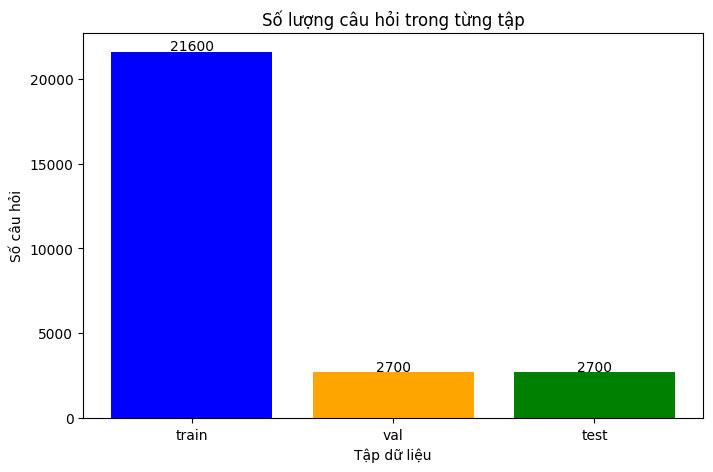

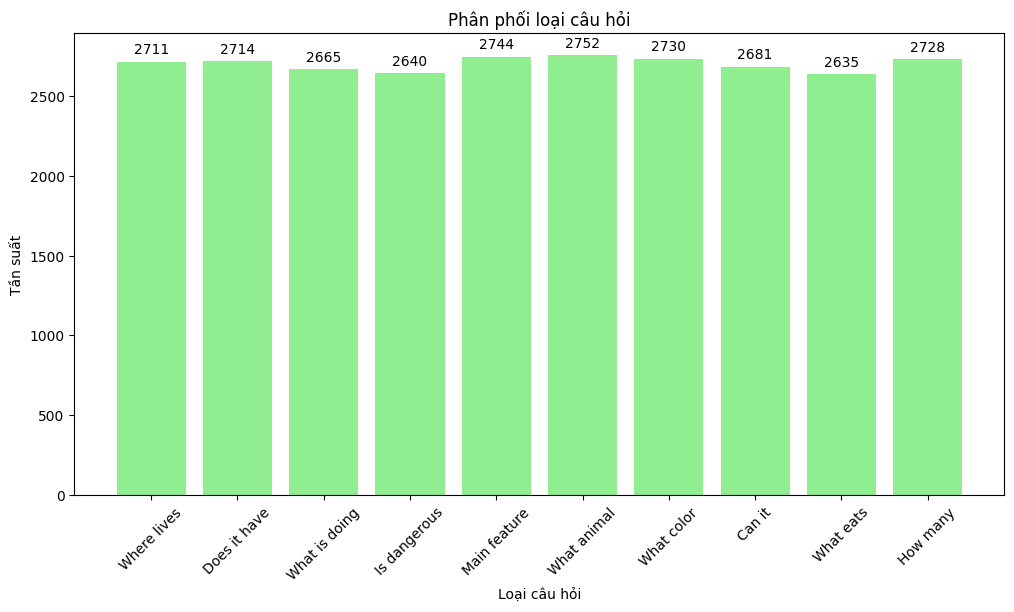

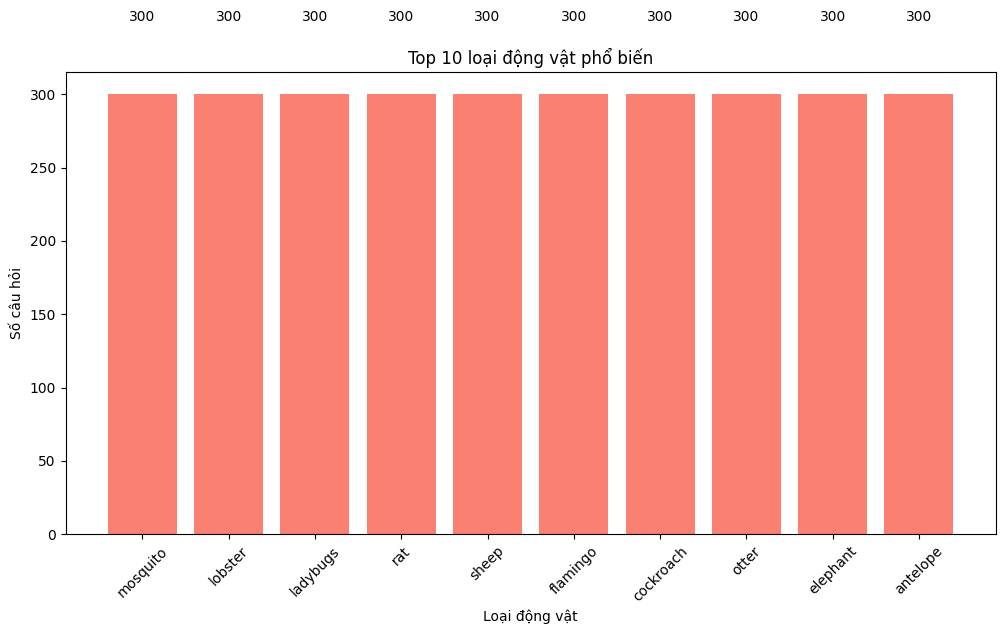

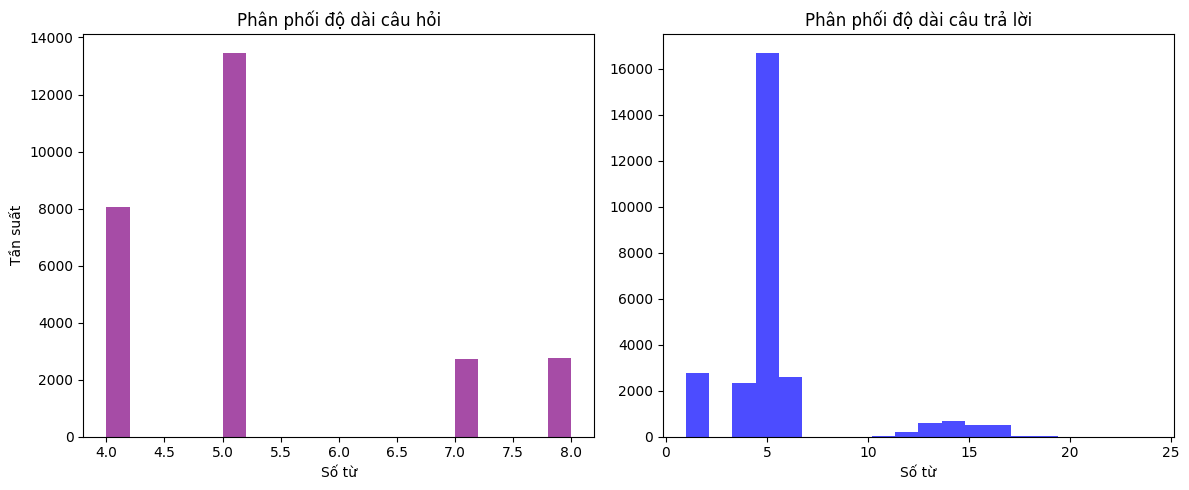

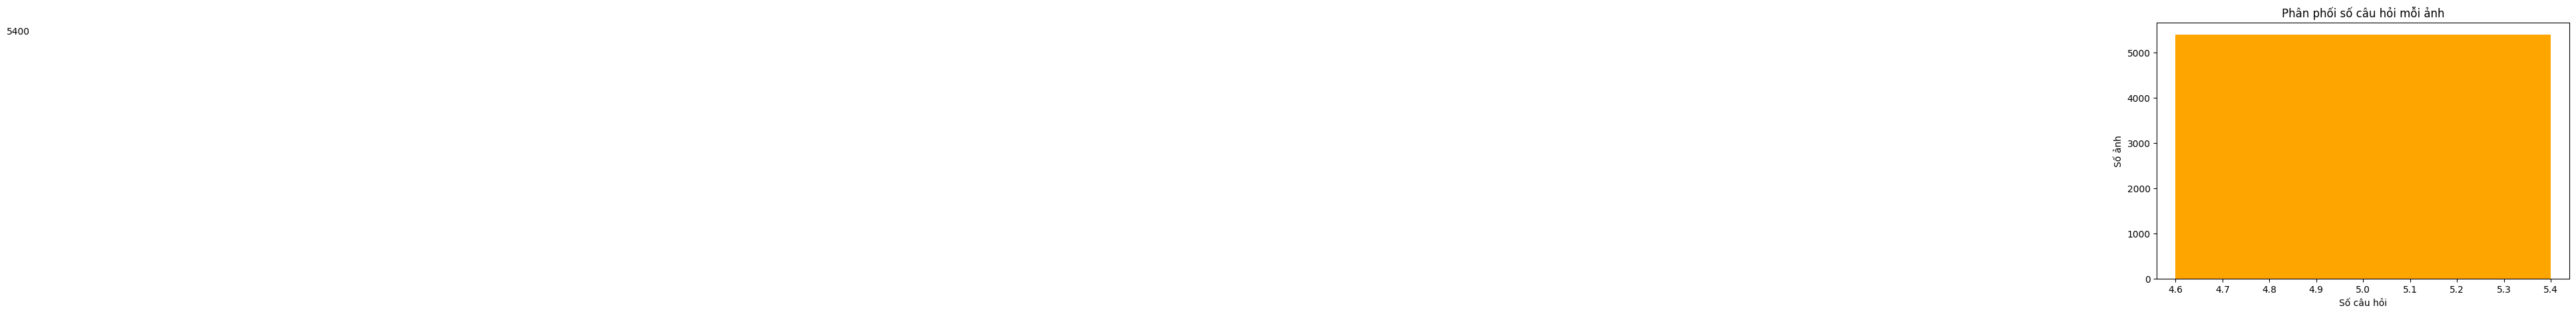

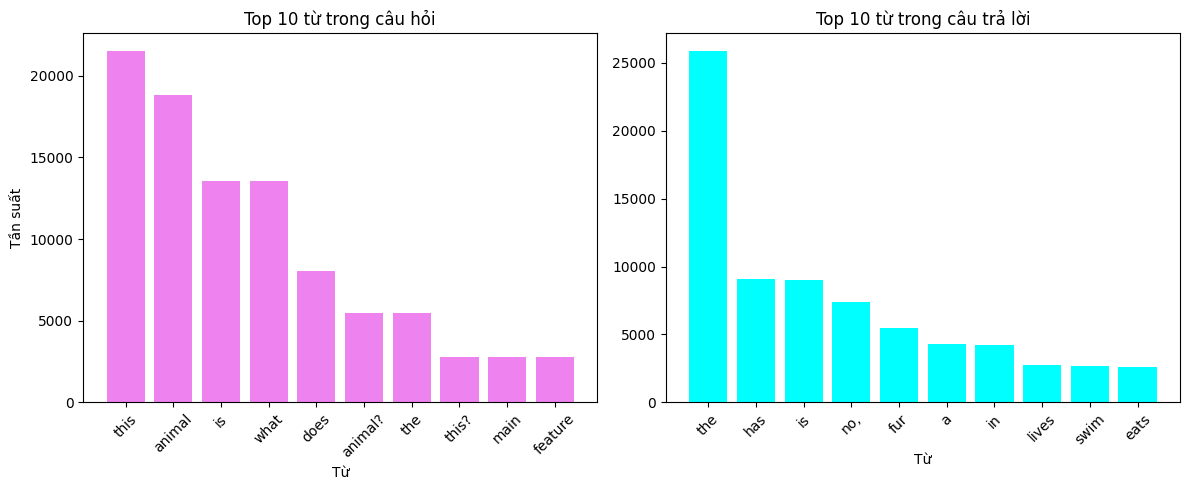

In [ ]:
print("Đang phân tích dataset...")
(sample_counts, question_types, animal_types, question_lengths, answer_lengths,
  question_per_image, vocab_questions, vocab_answers, avg_question_len, avg_answer_len) = analyze_dataset()

print("\n=== Tổng số câu hỏi trong từng tập ===")
for split, count in sample_counts.items():
    print(f"{split.capitalize()}: {count} câu hỏi")

print("\n=== Phân phối loại câu hỏi ===")
for k, v in question_types.items():
    print(f"{k}: {v}")

print("\n=== Top 10 loại động vật phổ biến ===")
for animal, count in animal_types.most_common(10):
    print(f"{animal}: {count} câu hỏi")

print("\n=== Độ dài trung bình ===")
print(f"Độ dài câu hỏi trung bình: {avg_question_len:.2f} từ")
print(f"Độ dài câu trả lời trung bình: {avg_answer_len:.2f} từ")

print("\n=== Phân phối số câu hỏi mỗi ảnh ===")
for k, v in question_per_image.items():
    print(f"{k} câu hỏi: {v} ảnh")

print("\n=== Top 10 từ vựng trong câu hỏi ===")
for word, count in vocab_questions.most_common(10):
    print(f"{word}: {count}")

print("\n=== Top 10 từ vựng trong câu trả lời ===")
for word, count in vocab_answers.most_common(10):
    print(f"{word}: {count}")

print("\nĐang trực quan hóa dữ liệu...")
visualize_data(sample_counts, question_types, animal_types, question_lengths, answer_lengths,
                question_per_image, vocab_questions, vocab_answers)

# Data Preprocessing

In [7]:
import os
import json
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, models
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from nltk.translate.bleu_score import sentence_bleu, SmoothingFunction
import wikipediaapi
from google.colab import files
import io

In [9]:
# Cấu hình toàn cục
class VQAConfig:
    BATCH_SIZE = 64
    IMAGE_SIZE = 128
    MAX_QUESTION_LENGTH = 32
    MAX_ANSWER_LENGTH = 128
    DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    NUM_WORKERS = 2
    NUM_EPOCHS = 50
    LEARNING_RATE = 1e-4

config = VQAConfig
print(f"Thiết bị sử dụng: {config.DEVICE}")

# Wikipedia API
wiki = wikipediaapi.Wikipedia(user_agent="MyVQAProject/1.0", language="en")

Thiết bị sử dụng: cuda


In [10]:
# Dataset
class AnimalVQADataset(Dataset):
    def __init__(self, root_dir, split, transform=None):
        self.root_dir = root_dir
        self.split = split
        self.transform = transform
        annotation_file = os.path.join(root_dir, split, 'annotations', f'{split}_vqa.json')

        with open(annotation_file, 'r') as f:
            self.annotations = json.load(f)

        self.samples = []
        for item in self.annotations:
            image_path = item['image_id']
            for qa in item['qa_pairs']:
                self.samples.append({
                    'image_path': image_path,
                    'question': qa['question'],
                    'answer': qa['answer']
                })

    def __len__(self):
        return len(self.samples)

    def __getitem__(self, idx):
        sample = self.samples[idx]
        image = Image.open(sample['image_path']).convert('RGB')
        if self.transform:
            image = self.transform(image)
        return {
            'image': image,
            'question': sample['question'],
            'answer': sample['answer'],
            'image_path': sample['image_path']
        }

In [11]:
# DataLoader
def get_data_loaders(root_dir):
    transform = transforms.Compose([
        transforms.Resize((config.IMAGE_SIZE, config.IMAGE_SIZE)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])

    train_dataset = AnimalVQADataset(root_dir, 'train', transform)
    val_dataset = AnimalVQADataset(root_dir, 'val', transform)
    test_dataset = AnimalVQADataset(root_dir, 'test', transform)

    train_loader = DataLoader(train_dataset, batch_size=config.BATCH_SIZE, shuffle=True,
                             num_workers=config.NUM_WORKERS, pin_memory=True)
    val_loader = DataLoader(val_dataset, batch_size=config.BATCH_SIZE, shuffle=False,
                           num_workers=config.NUM_WORKERS, pin_memory=True)
    test_loader = DataLoader(test_dataset, batch_size=config.BATCH_SIZE, shuffle=False,
                            num_workers=config.NUM_WORKERS, pin_memory=True)

    return train_loader, val_loader, test_loader, train_dataset, val_dataset, test_dataset

In [12]:
# Tokenizer
class VQAQuestionTokenizer:
    def __init__(self, train_dataset, min_freq=2):
        self.word2idx = {'<PAD>': 0, '<UNK>': 1}
        self.idx2word = {0: '<PAD>', 1: '<UNK>'}
        self.word_freq = {}

        for sample in train_dataset.samples:
            for word in sample['question'].lower().split():
                self.word_freq[word] = self.word_freq.get(word, 0) + 1

        idx = 2
        for word, freq in self.word_freq.items():
            if freq >= min_freq and word not in self.word2idx:
                self.word2idx[word] = idx
                self.idx2word[idx] = word
                idx += 1
        self.vocab_size = len(self.word2idx)
        print(f"Question vocab size: {self.vocab_size}")

    def encode(self, text, max_length=config.MAX_QUESTION_LENGTH):
        tokens = text.lower().split()[:max_length]
        ids = [self.word2idx.get(token, self.word2idx['<UNK>']) for token in tokens]
        return torch.tensor(ids + [self.word2idx['<PAD>']] * (max_length - len(ids)))

class VQAAnswerTokenizer:
    def __init__(self, train_dataset, min_freq=2):
        self.word2idx = {'<PAD>': 0, '<UNK>': 1, '<SOS>': 2, '<EOS>': 3}
        self.idx2word = {0: '<PAD>', 1: '<UNK>', 2: '<SOS>', 3: '<EOS>'}
        self.word_freq = {}

        for sample in train_dataset.samples:
            for word in sample['answer'].lower().split():
                self.word_freq[word] = self.word_freq.get(word, 0) + 1

        idx = 4
        for word, freq in self.word_freq.items():
            if freq >= min_freq and word not in self.word2idx:
                self.word2idx[word] = idx
                self.idx2word[idx] = word
                idx += 1
        self.vocab_size = len(self.word2idx)
        print(f"Answer vocab size: {self.vocab_size}")

    def encode(self, text, max_length=config.MAX_ANSWER_LENGTH):
        tokens = ['<SOS>'] + text.lower().split()[:max_length-2] + ['<EOS>']
        ids = [self.word2idx.get(token, self.word2idx['<UNK>']) for token in tokens]
        return torch.tensor(ids + [self.word2idx['<PAD>']] * (max_length - len(ids)))

    def decode(self, ids):
        return ' '.join(self.idx2word.get(id.item(), '<UNK>') for id in ids if id.item() not in [0, 2, 3])

In [13]:
import pickle

# Chạy và lưu tokenizer trực tiếp trong cell
root_dir = '/content/animal_vqa_split/'  # Thay bằng đường dẫn tới dataset của bạn
train_loader, val_loader, test_loader, train_dataset, val_dataset, test_dataset = get_data_loaders(root_dir)

print("Initializing tokenizers...")
question_tok = VQAQuestionTokenizer(train_dataset)
answer_tok = VQAAnswerTokenizer(train_dataset)

# Lưu tokenizer trực tiếp
with open('/content/question_tokenizer.pkl', 'wb') as f:
    pickle.dump({'word2idx': question_tok.word2idx, 'idx2word': question_tok.idx2word}, f)
with open('/content/answer_tokenizer.pkl', 'wb') as f:
    pickle.dump({'word2idx': answer_tok.word2idx, 'idx2word': answer_tok.idx2word}, f)
print("Question tokenizer saved to /content/question_tokenizer.pkl")
print("Answer tokenizer saved to /content/answer_tokenizer.pkl")

Initializing tokenizers...
Question vocab size: 29
Answer vocab size: 583
Question tokenizer saved to /content/question_tokenizer.pkl
Answer tokenizer saved to /content/answer_tokenizer.pkl


In [14]:
# Visualize Data
def visualize_data(dataset, split_name, answer_tok, question_tok, num_samples=5):
    print(f"\n=== {split_name.upper()} Dataset ===")
    print(f"Total samples: {len(dataset)}")

    indices = np.random.choice(len(dataset), min(num_samples, len(dataset)), replace=False)
    plt.figure(figsize=(15, num_samples * 3))

    for i, idx in enumerate(indices):
        sample = dataset[idx]
        img = sample['image'].permute(1, 2, 0).numpy()
        img = np.clip(img * np.array([0.229, 0.224, 0.225]) + np.array([0.485, 0.456, 0.406]), 0, 1)

        q_tokens = question_tok.encode(sample['question']).tolist()
        a_tokens = answer_tok.encode(sample['answer']).tolist()

        print(f"\nSample {i+1} (Idx {idx}):")
        print(f"Image: {sample['image_path']}")
        print(f"Question: {sample['question']}")
        print(f"Answer: {sample['answer']}")
        print(f"Q Tokens: {q_tokens[:10]}...")
        print(f"A Tokens: {a_tokens[:10]}...")

        plt.subplot(num_samples, 1, i+1)
        plt.imshow(img)
        plt.title(f"{split_name} Sample {i+1}: {sample['question'][:30]}...")
        plt.axis('off')

    plt.tight_layout()
    plt.show()

In [15]:
def print_processed_vqa_data(dataset, split_name, answer_tokenizer, question_tokenizer, num_samples=5):
    print(f"\n=== Dữ liệu đã xử lý từ tập {split_name.upper()} ===")
    print(f"Tổng số mẫu: {len(dataset)}")
    print(f"In {min(num_samples, len(dataset))} mẫu ngẫu nhiên:\n")

    indices = np.random.choice(len(dataset), size=min(num_samples, len(dataset)), replace=False)
    plt.figure(figsize=(15, num_samples * 3))

    for i, idx in enumerate(indices):
        sample = dataset[idx]
        image = sample['image']
        question = sample['question']
        answer = sample['answer']
        image_path = sample['image_path']

        question_tokens = question_tokenizer.encode(question)
        answer_tokens = answer_tokenizer.encode(answer)

        image_np = image.permute(1, 2, 0).numpy()
        image_np = np.clip(image_np * np.array([0.229, 0.224, 0.225]) + np.array([0.485, 0.456, 0.406]), 0, 1)

        print(f"Mẫu {i + 1} (Index {idx}):")
        print(f"  Đường dẫn ảnh: {image_path}")
        print(f"  Kích thước ảnh: {list(image.shape)}")
        print(f"  Câu hỏi: {question}")
        print(f"  Câu trả lời: {answer}")
        print(f"  Token câu hỏi: {question_tokens.tolist()[:10]}...")
        print(f"  Token câu trả lời: {answer_tokens.tolist()[:10]}...")
        print("  ---")

        plt.subplot(num_samples, 1, i + 1)
        plt.imshow(image_np)
        plt.title(f"Mẫu {i + 1}: {question[:30]}...", fontsize=10)
        plt.axis('off')

    plt.tight_layout()
    plt.show()

Đang chuẩn bị dữ liệu...
Đang khởi tạo tokenizer...
Answer vocab size: 583
Question vocab size: 29
Kiểm tra dữ liệu đã xử lý...

=== Dữ liệu đã xử lý từ tập TRAIN ===
Tổng số mẫu: 21600
In 5 mẫu ngẫu nhiên:

Mẫu 1 (Index 21260):
  Đường dẫn ảnh: /content/animal_vqa_split/train/images/orangutan_50.jpg
  Kích thước ảnh: [3, 128, 128]
  Câu hỏi: What does this animal eat?
  Câu trả lời: The orangutan eats unknown food
  Token câu hỏi: [7, 2, 3, 4, 20, 0, 0, 0, 0, 0]...
  Token câu trả lời: [2, 5, 212, 22, 23, 24, 3, 0, 0, 0]...
  ---
Mẫu 2 (Index 1071):
  Đường dẫn ảnh: /content/animal_vqa_split/train/images/jellyfish_25.jpg
  Kích thước ảnh: [3, 128, 128]
  Câu hỏi: What animal is this?
  Câu trả lời: Jellyfish
  Token câu hỏi: [7, 4, 9, 21, 0, 0, 0, 0, 0, 0]...
  Token câu trả lời: [2, 98, 3, 0, 0, 0, 0, 0, 0, 0]...
  ---
Mẫu 3 (Index 948):
  Đường dẫn ảnh: /content/animal_vqa_split/train/images/wombat_29.jpg
  Kích thước ảnh: [3, 128, 128]
  Câu hỏi: How many animals are in the image?


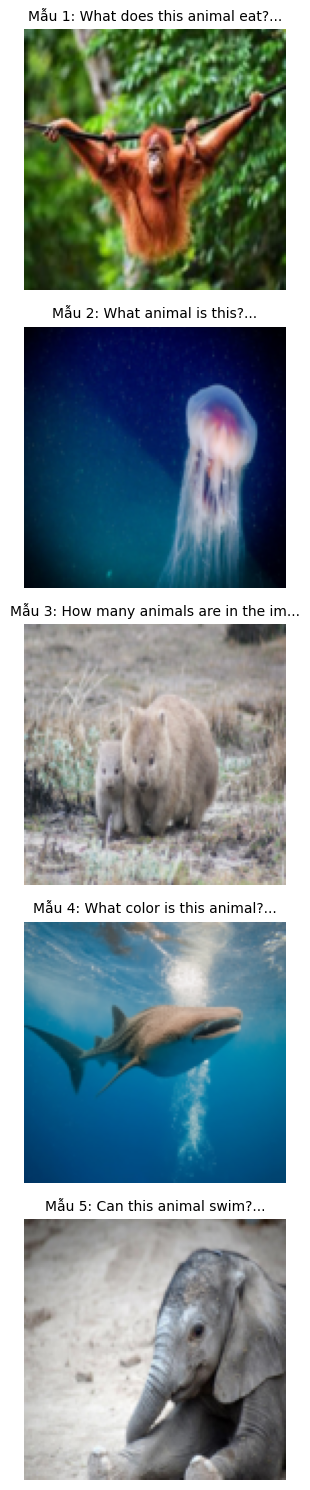


=== Dữ liệu đã xử lý từ tập VAL ===
Tổng số mẫu: 2700
In 5 mẫu ngẫu nhiên:

Mẫu 1 (Index 1977):
  Đường dẫn ảnh: /content/animal_vqa_split/val/images/wombat_19.jpg
  Kích thước ảnh: [3, 128, 128]
  Câu hỏi: Is this animal dangerous?
  Câu trả lời: No, the wombat is safe
  Token câu hỏi: [9, 3, 4, 11, 0, 0, 0, 0, 0, 0]...
  Token câu trả lời: [2, 4, 5, 269, 11, 12, 3, 0, 0, 0]...
  ---
Mẫu 2 (Index 256):
  Đường dẫn ảnh: /content/animal_vqa_split/val/images/whale_26.jpg
  Kích thước ảnh: [3, 128, 128]
  Câu hỏi: Does this animal have fur?
  Câu trả lời: No, the whale has no fur
  Token câu hỏi: [2, 3, 4, 5, 6, 0, 0, 0, 0, 0]...
  Token câu trả lời: [2, 4, 5, 160, 7, 8, 9, 3, 0, 0]...
  ---
Mẫu 3 (Index 1891):
  Đường dẫn ảnh: /content/animal_vqa_split/val/images/orangutan_4.jpg
  Kích thước ảnh: [3, 128, 128]
  Câu hỏi: Does this animal have fur?
  Câu trả lời: No, the orangutan has no fur
  Token câu hỏi: [2, 3, 4, 5, 6, 0, 0, 0, 0, 0]...
  Token câu trả lời: [2, 4, 5, 212, 7, 8, 9, 3

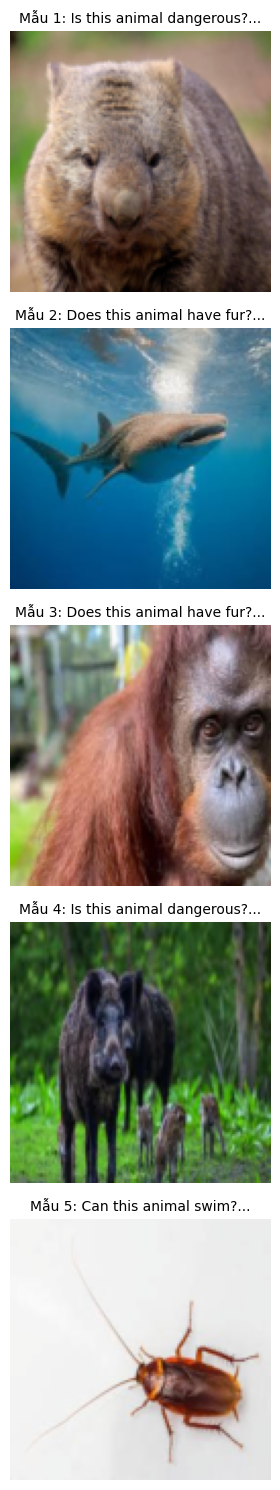


=== Dữ liệu đã xử lý từ tập TEST ===
Tổng số mẫu: 2700
In 5 mẫu ngẫu nhiên:

Mẫu 1 (Index 1728):
  Đường dẫn ảnh: /content/animal_vqa_split/test/images/hedgehog_34.jpg
  Kích thước ảnh: [3, 128, 128]
  Câu hỏi: Is this animal dangerous?
  Câu trả lời: No, the hedgehog is safe
  Token câu hỏi: [9, 3, 4, 11, 0, 0, 0, 0, 0, 0]...
  Token câu trả lời: [2, 4, 5, 6, 11, 12, 3, 0, 0, 0]...
  ---
Mẫu 2 (Index 2505):
  Đường dẫn ảnh: /content/animal_vqa_split/test/images/goat_12.jpg
  Kích thước ảnh: [3, 128, 128]
  Câu hỏi: What animal is this?
  Câu trả lời: Goat
  Token câu hỏi: [7, 4, 9, 21, 0, 0, 0, 0, 0, 0]...
  Token câu trả lời: [2, 75, 3, 0, 0, 0, 0, 0, 0, 0]...
  ---
Mẫu 3 (Index 1609):
  Đường dẫn ảnh: /content/animal_vqa_split/test/images/eagle_57.jpg
  Kích thước ảnh: [3, 128, 128]
  Câu hỏi: Can this animal swim?
  Câu trả lời: No, the eagle cannot swim
  Token câu hỏi: [18, 3, 4, 19, 0, 0, 0, 0, 0, 0]...
  Token câu trả lời: [2, 4, 5, 219, 19, 20, 3, 0, 0, 0]...
  ---
Mẫu 4 (Ind

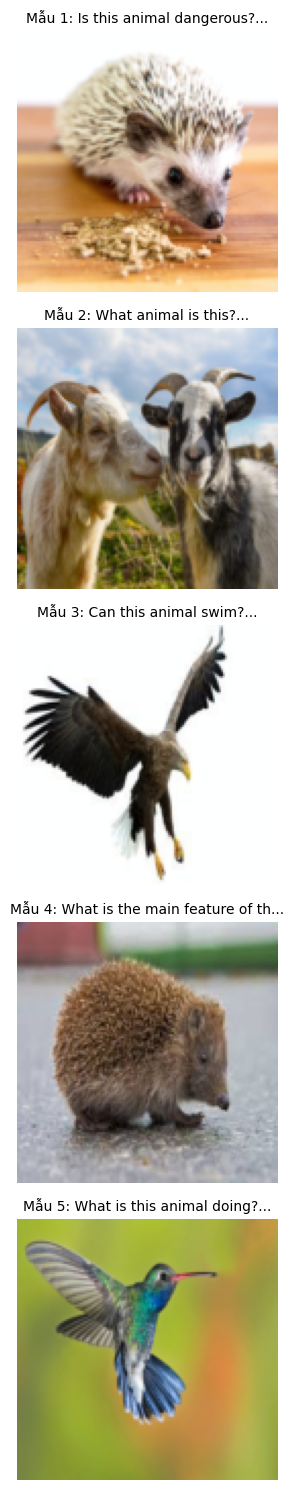

In [16]:
def main():
    root_dir = '/content/animal_vqa_split'

    print("Đang chuẩn bị dữ liệu...")
    train_loader, val_loader, test_loader, train_dataset, val_dataset, test_dataset = get_data_loaders(root_dir)

    print("Đang khởi tạo tokenizer...")
    answer_tokenizer = VQAAnswerTokenizer(train_dataset)
    question_tokenizer = VQAQuestionTokenizer(train_dataset)

    print("Kiểm tra dữ liệu đã xử lý...")
    print_processed_vqa_data(train_dataset, 'train', answer_tokenizer, question_tokenizer, num_samples=5)
    print_processed_vqa_data(val_dataset, 'val', answer_tokenizer, question_tokenizer, num_samples=5)
    print_processed_vqa_data(test_dataset, 'test', answer_tokenizer, question_tokenizer, num_samples=5)

    return train_loader, val_loader, test_loader, train_dataset, val_dataset, test_dataset, answer_tokenizer, question_tokenizer

if __name__ == "__main__":
    train_loader, val_loader, test_loader, train_dataset, val_dataset, test_dataset, answer_tokenizer, question_tokenizer = main()

### Build from Scratch

#### CNN + LSTM


In [38]:
# Model CNN + LSTM
class VQACNNLSTM(nn.Module):
    def __init__(self, question_vocab_size, answer_vocab_size, hidden_size=256):
        super(VQACNNLSTM, self).__init__()
        self.hidden_size = hidden_size

        self.cnn = nn.Sequential(
            nn.Conv2d(3, 32, 3, padding=1), nn.ReLU(), nn.MaxPool2d(2),
            nn.Conv2d(32, 64, 3, padding=1), nn.ReLU(), nn.MaxPool2d(2),
            nn.Conv2d(64, 128, 3, padding=1), nn.ReLU(), nn.MaxPool2d(2)
        )
        self.cnn_fc = nn.Linear(128 * (config.IMAGE_SIZE // 8) ** 2, hidden_size)

        self.q_embed = nn.Embedding(question_vocab_size, hidden_size)
        self.q_lstm = nn.LSTM(hidden_size, hidden_size, batch_first=True)

        self.combined_fc = nn.Linear(hidden_size * 2, hidden_size)
        self.a_embed = nn.Embedding(answer_vocab_size, hidden_size)
        self.a_lstm = nn.LSTM(hidden_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, answer_vocab_size)

    def forward(self, images, questions, answers=None):
        img_feats = self.cnn(images).view(images.size(0), -1)
        img_feats = self.cnn_fc(img_feats)

        q_embed = self.q_embed(questions)
        q_out, _ = self.q_lstm(q_embed)
        q_out = q_out[:, -1, :]

        combined = torch.cat((img_feats, q_out), dim=1)
        combined = self.combined_fc(combined)
        combined = combined.unsqueeze(1)

        if answers is not None:
            a_embed = self.a_embed(answers[:, :-1])
            combined = combined.repeat(1, a_embed.size(1), 1)
            a_out, _ = self.a_lstm(a_embed + combined)
            return self.fc(a_out)
        else:
            outputs, hidden = [], None
            input_token = torch.full((images.size(0), 1), 2, device=config.DEVICE)
            for _ in range(config.MAX_ANSWER_LENGTH):
                a_embed = self.a_embed(input_token)
                a_out, hidden = self.a_lstm(a_embed + combined, hidden)
                output = self.fc(a_out.squeeze(1))
                input_token = output.argmax(dim=1).unsqueeze(1)
                outputs.append(output)
                combined = combined[:, :1, :]
            return torch.stack(outputs, dim=1)

In [41]:
# Training với Early Stopping
def train_model(model, train_loader, val_loader, answer_tok, question_tok, patience=3):
    optimizer = torch.optim.Adam(model.parameters(), lr=config.LEARNING_RATE)
    criterion = nn.CrossEntropyLoss(ignore_index=0)

    train_losses, val_losses, train_accs, val_accs = [], [], [], []

    best_val_loss = float('inf')  # Giá trị loss tốt nhất ban đầu là vô cực
    patience_counter = 0  # Đếm số epoch không cải thiện
    best_model_path = '/content/vqa_model_cnn_lstm_best.pth'  # Đường dẫn lưu mô hình tốt nhất

    for epoch in range(config.NUM_EPOCHS):
        model.train()
        t_loss, t_correct, t_total = 0, 0, 0
        for batch in tqdm(train_loader, desc=f"Epoch {epoch+1} Train"):
            images, questions, answers = batch['image'].to(config.DEVICE), \
                torch.stack([question_tok.encode(q) for q in batch['question']]).to(config.DEVICE), \
                torch.stack([answer_tok.encode(a) for a in batch['answer']]).to(config.DEVICE)

            optimizer.zero_grad()
            outputs = model(images, questions, answers)
            loss = criterion(outputs.view(-1, answer_tok.vocab_size), answers[:, 1:].reshape(-1))
            loss.backward()
            optimizer.step()

            t_loss += loss.item() * images.size(0)
            t_correct += (outputs.argmax(dim=2) == answers[:, 1:]).float().sum().item()
            t_total += answers[:, 1:].ne(0).sum().item()

        train_losses.append(t_loss / len(train_loader.dataset))
        train_accs.append(t_correct / t_total)

        model.eval()
        v_loss, v_correct, v_total = 0, 0, 0
        with torch.no_grad():
            for batch in tqdm(val_loader, desc=f"Epoch {epoch+1} Val"):
                images, questions, answers = batch['image'].to(config.DEVICE), \
                    torch.stack([question_tok.encode(q) for q in batch['question']]).to(config.DEVICE), \
                    torch.stack([answer_tok.encode(a) for a in batch['answer']]).to(config.DEVICE)

                outputs = model(images, questions, answers)
                loss = criterion(outputs.view(-1, answer_tok.vocab_size), answers[:, 1:].reshape(-1))

                v_loss += loss.item() * images.size(0)
                v_correct += (outputs.argmax(dim=2) == answers[:, 1:]).float().sum().item()
                v_total += answers[:, 1:].ne(0).sum().item()

        val_losses.append(v_loss / len(val_loader.dataset))
        val_accs.append(v_correct / v_total)

        print(f"Epoch {epoch+1}: Train Loss: {train_losses[-1]:.4f}, Train Acc: {train_accs[-1]:.4f}, "
              f"Val Loss: {val_losses[-1]:.4f}, Val Acc: {val_accs[-1]:.4f}")

        # Early stopping logic
        current_val_loss = val_losses[-1]
        if current_val_loss < best_val_loss:
            best_val_loss = current_val_loss
            patience_counter = 0  # Reset bộ đếm nếu có cải thiện
            # Lưu mô hình tốt nhất
            torch.save(model.state_dict(), best_model_path)
            print(f"Best model saved to {best_model_path} with Val Loss: {best_val_loss:.4f}")
        else:
            patience_counter += 1
            print(f"No improvement in validation loss. Patience: {patience_counter}/{patience}")

        # Dừng nếu vượt quá patience
        if patience_counter >= patience:
            print(f"Early stopping triggered after {epoch+1} epochs!")
            break

    # Lưu mô hình cuối cùng (nếu muốn giữ cả phiên bản cuối)
    final_model_path = '/content/vqa_model_cnn_lstm_final.pth'
    torch.save(model.state_dict(), final_model_path)
    print(f"Final model saved to {final_model_path}")

    return train_losses, val_losses, train_accs, val_accs

In [42]:
# Evaluation
def evaluate_model(model, test_loader, answer_tok, question_tok):
    model.eval()
    criterion = nn.CrossEntropyLoss(ignore_index=0)
    t_loss, t_correct, t_total, bleu_scores = 0, 0, 0, []

    with torch.no_grad():
        for batch in tqdm(test_loader, desc="Evaluating"):
            images, questions, answers = batch['image'].to(config.DEVICE), \
                torch.stack([question_tok.encode(q) for q in batch['question']]).to(config.DEVICE), \
                torch.stack([answer_tok.encode(a) for a in batch['answer']]).to(config.DEVICE)

            outputs = model(images, questions, answers)
            loss = criterion(outputs.view(-1, answer_tok.vocab_size), answers[:, 1:].reshape(-1))

            t_loss += loss.item() * images.size(0)
            t_correct += (outputs.argmax(dim=2) == answers[:, 1:]).float().sum().item()
            t_total += answers[:, 1:].ne(0).sum().item()

            for i in range(len(batch['answer'])):
                pred = answer_tok.decode(outputs[i].argmax(dim=1))
                bleu_scores.append(sentence_bleu([batch['answer'][i].lower().split()], pred.lower().split(),
                                               smoothing_function=SmoothingFunction().method1))

    t_loss /= len(test_loader.dataset)
    t_acc = t_correct / t_total
    avg_bleu = sum(bleu_scores) / len(bleu_scores)
    print(f"Test Loss: {t_loss:.4f}, Test Acc: {t_acc:.4f}, BLEU: {avg_bleu:.4f}")
    return t_loss, t_acc, avg_bleu

In [43]:
# Plot Metrics
def plot_metrics(train_losses, val_losses, train_accs, val_accs):
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(train_losses, label='Train Loss')
    plt.plot(val_losses, label='Val Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Loss')

    plt.subplot(1, 2, 2)
    plt.plot(train_accs, label='Train Acc')
    plt.plot(val_accs, label='Val Acc')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.title('Accuracy')

    plt.tight_layout()
    plt.show()

In [44]:
# Visualize Predictions
def visualize_predictions(model, test_loader, answer_tok, question_tok, num_samples=10):
    model.eval()
    samples = {}

    with torch.no_grad():
        for batch in test_loader:
            for i in range(len(batch['image'])):
                animal = os.path.basename(batch['image_path'][i]).split('_')[0]
                if animal not in samples and len(samples) < num_samples:
                    img = batch['image'][i].unsqueeze(0).to(config.DEVICE)
                    q = torch.stack([question_tok.encode(batch['question'][i])]).to(config.DEVICE)
                    out = model(img, q)
                    pred = answer_tok.decode(out[0].argmax(dim=1))

                    wiki_page = wiki.page(animal)
                    expanded = pred + (f" {wiki_page.summary.split('.')[0]}." if wiki_page.exists() else "")

                    samples[animal] = {
                        'image_path': batch['image_path'][i],
                        'question': batch['question'][i],
                        'answer': batch['answer'][i],
                        'predict': pred,
                        'expanded': expanded
                    }
            if len(samples) >= num_samples:
                break

    plt.figure(figsize=(15, num_samples * 3))
    for i, (animal, data) in enumerate(samples.items()):
        plt.subplot(num_samples, 1, i+1)
        img = Image.open(data['image_path'])
        plt.imshow(img)
        plt.title(f"Animal: {animal}")
        plt.axis('off')
        plt.text(0.5, -0.1, f"Q: {data['question']}", ha='center', transform=plt.gca().transAxes)
        plt.text(0.5, -0.2, f"A: {data['answer']}", ha='center', transform=plt.gca().transAxes)
        plt.text(0.5, -0.3, f"P: {data['predict']}", ha='center', transform=plt.gca().transAxes, color='blue')
        plt.text(0.5, -0.4, f"E: {data['expanded']}", ha='center', transform=plt.gca().transAxes, color='green', wrap=True)

    plt.tight_layout()
    plt.savefig('predictions.png')
    plt.show()

In [45]:
# Interactive Prediction
def interactive_predict(model, answer_tok, question_tok):
    transform = transforms.Compose([
        transforms.Resize((config.IMAGE_SIZE, config.IMAGE_SIZE)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])

    print("Upload an image:")
    uploaded = files.upload()
    for filename, content in uploaded.items():
        img = Image.open(io.BytesIO(content)).convert('RGB')
        img_tensor = transform(img).unsqueeze(0).to(config.DEVICE)

        plt.imshow(img)
        plt.axis('off')
        plt.show()

        question = input("Enter your question: ")
        q_tensor = torch.stack([question_tok.encode(question)]).to(config.DEVICE)

        model.eval()
        with torch.no_grad():
            out = model(img_tensor, q_tensor)
            pred = answer_tok.decode(out[0].argmax(dim=1))

            animal = filename.split('_')[0]  # Giả sử tên file có dạng animal_number.jpg
            wiki_page = wiki.page(animal)
            expanded = pred + (f" {wiki_page.summary.split('.')[0]}." if wiki_page.exists() else "")

        print(f"\nPredicted Answer: {pred}")
        print(f"Expanded Answer: {expanded}")

Preparing data...
Initializing tokenizers...
Question vocab size: 29
Answer vocab size: 583
Training model...


Epoch 1 Val: 100%|██████████| 169/169 [00:31<00:00,  5.38it/s]


Epoch 1: Train Loss: 2.7654, Train Acc: 0.4367, Val Loss: 1.9113, Val Acc: 0.5586
Best model saved to /content/vqa_model_cnn_lstm_best.pth with Val Loss: 1.9113


Epoch 2 Val: 100%|██████████| 169/169 [00:30<00:00,  5.58it/s]


Epoch 2: Train Loss: 1.7564, Train Acc: 0.5734, Val Loss: 1.6691, Val Acc: 0.5807
Best model saved to /content/vqa_model_cnn_lstm_best.pth with Val Loss: 1.6691


Epoch 3 Val: 100%|██████████| 169/169 [00:30<00:00,  5.52it/s]


Epoch 3: Train Loss: 1.5429, Train Acc: 0.6157, Val Loss: 1.5112, Val Acc: 0.6125
Best model saved to /content/vqa_model_cnn_lstm_best.pth with Val Loss: 1.5112


Epoch 4 Val: 100%|██████████| 169/169 [00:31<00:00,  5.41it/s]


Epoch 4: Train Loss: 1.2033, Train Acc: 0.7138, Val Loss: 1.3407, Val Acc: 0.6426
Best model saved to /content/vqa_model_cnn_lstm_best.pth with Val Loss: 1.3407


Epoch 5 Val: 100%|██████████| 169/169 [00:30<00:00,  5.55it/s]


Epoch 5: Train Loss: 0.8807, Train Acc: 0.7448, Val Loss: 1.2729, Val Acc: 0.6462
Best model saved to /content/vqa_model_cnn_lstm_best.pth with Val Loss: 1.2729


Epoch 6 Val: 100%|██████████| 169/169 [00:30<00:00,  5.48it/s]


Epoch 6: Train Loss: 0.7535, Train Acc: 0.7587, Val Loss: 1.2518, Val Acc: 0.6470
Best model saved to /content/vqa_model_cnn_lstm_best.pth with Val Loss: 1.2518


Epoch 7 Val: 100%|██████████| 169/169 [00:30<00:00,  5.63it/s]


Epoch 7: Train Loss: 0.6855, Train Acc: 0.7706, Val Loss: 1.2537, Val Acc: 0.6479
No improvement in validation loss. Patience: 1/3


Epoch 8 Val: 100%|██████████| 169/169 [00:31<00:00,  5.44it/s]


Epoch 8: Train Loss: 0.6357, Train Acc: 0.7797, Val Loss: 1.2540, Val Acc: 0.6453
No improvement in validation loss. Patience: 2/3


Epoch 9 Val: 100%|██████████| 169/169 [00:30<00:00,  5.56it/s]


Epoch 9: Train Loss: 0.5982, Train Acc: 0.7874, Val Loss: 1.2538, Val Acc: 0.6475
No improvement in validation loss. Patience: 3/3
Early stopping triggered after 9 epochs!
Final model saved to /content/vqa_model_cnn_lstm_final.pth
Plotting metrics...


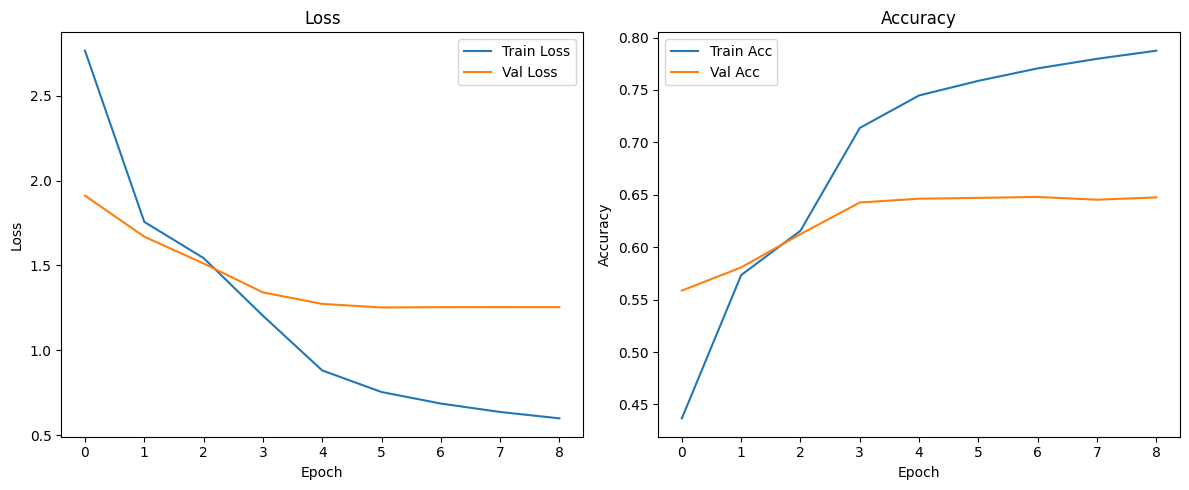

Evaluating model...


TypeError: evaluate_model() takes 2 positional arguments but 4 were given

In [36]:
root_dir = '/content/animal_vqa_split'

# Chuẩn bị dữ liệu
print("Preparing data...")
train_loader, val_loader, test_loader, train_dataset, val_dataset, test_dataset = get_data_loaders(root_dir)

print("Initializing tokenizers...")
question_tok = VQAQuestionTokenizer(train_dataset)
answer_tok = VQAAnswerTokenizer(train_dataset)

# Khởi tạo và huấn luyện mô hình
print("Training model...")
model = VQACNNLSTM(question_tok.vocab_size, answer_tok.vocab_size).to(config.DEVICE)
train_losses, val_losses, train_accs, val_accs = train_model(model, train_loader, val_loader, answer_tok, question_tok)

print("Plotting metrics...")
plot_metrics(train_losses, val_losses, train_accs, val_accs)

Evaluating model...


Evaluating: 100%|██████████| 169/169 [00:37<00:00,  4.54it/s]

Test Loss: 1.3013, Test Acc: 0.6399, BLEU: 0.1336
Visualizing predictions...


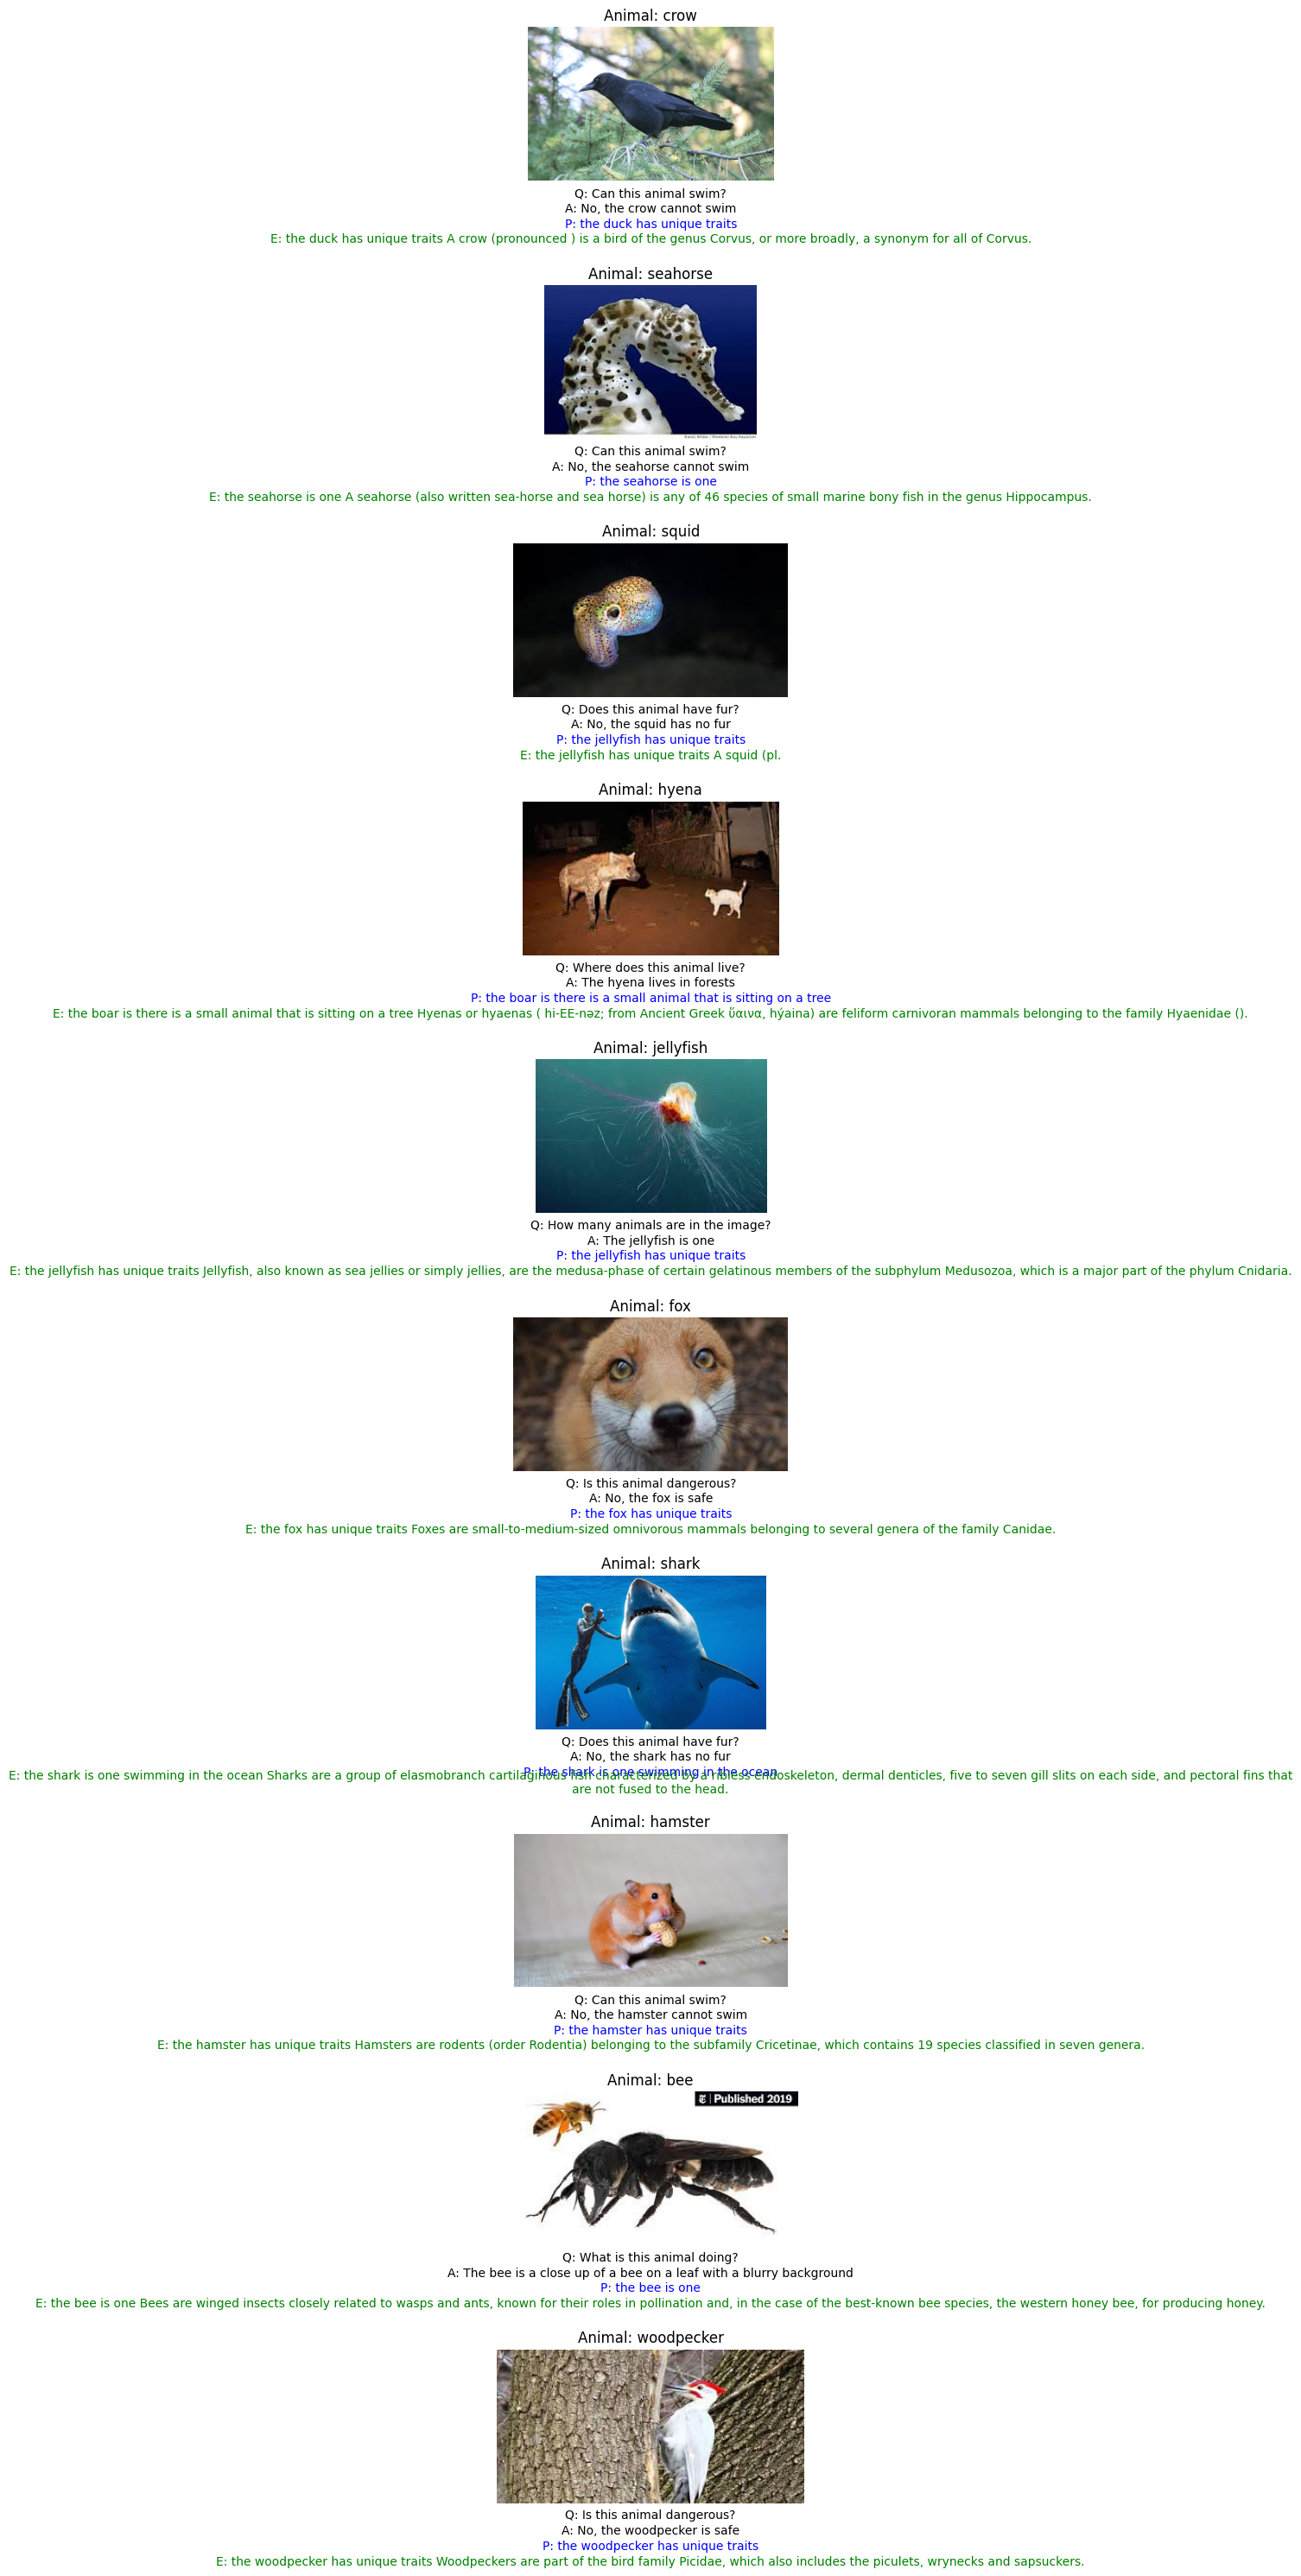


=== Interactive Prediction ===
Upload an image:


Saving cat_9.jpg to cat_9.jpg


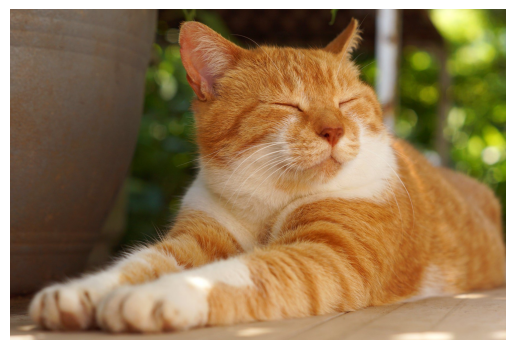

Enter your question: What is this animal?

Predicted Answer: the cat has unique traits
Expanded Answer: the cat has unique traits The cat (Felis catus), also referred to as the domestic cat or house cat, is a small domesticated carnivorous mammal.


In [47]:
print("Evaluating model...")
evaluate_model(model, test_loader, answer_tok, question_tok)

print("Visualizing predictions...")
visualize_predictions(model, test_loader, answer_tok, question_tok)

# Dự đoán tương tác
print("\n=== Interactive Prediction ===")
interactive_predict(model, answer_tok, question_tok)

### Pretrain Model

#### ResNet18 - BART - MLP Fusion

In [23]:
from transformers import BartTokenizer, BartModel, BartForConditionalGeneration
from transformers.modeling_outputs import BaseModelOutput

In [24]:
# Cấu hình toàn cục
class VQAConfig:
    BATCH_SIZE = 16  # Giảm batch size để phù hợp với BART
    IMAGE_SIZE = 224  # ResNet yêu cầu kích thước 224x224
    MAX_QUESTION_LENGTH = 32
    MAX_ANSWER_LENGTH = 64
    DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    NUM_WORKERS = 2
    NUM_EPOCHS = 50  # Giảm số epoch để chạy nhanh hơn khi test
    LEARNING_RATE = 1e-4  # Learning rate nhỏ hơn cho mô hình pre-trained

config = VQAConfig
print(f"Thiết bị sử dụng: {config.DEVICE}")

# Wikipedia API
wiki = wikipediaapi.Wikipedia(user_agent="MyVQAProject/1.0", language="en")

Thiết bị sử dụng: cuda


In [25]:
# Model ResNet18 + BART + MLP Fusion
class VQAPretrainedModel(nn.Module):
    def __init__(self):
        super(VQAPretrainedModel, self).__init__()
        self.resnet = models.resnet18(weights=models.ResNet18_Weights.IMAGENET1K_V1)
        self.resnet.fc = nn.Identity()
        self.bart_tokenizer = BartTokenizer.from_pretrained('facebook/bart-base')
        self.bart = BartForConditionalGeneration.from_pretrained('facebook/bart-base')
        self.fusion_mlp = nn.Sequential(
            nn.Linear(512 + 768, 512),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(512, 768)
        )
        for param in self.resnet.parameters():
            param.requires_grad = False
        for param in self.bart.model.encoder.parameters():
            param.requires_grad = False
        for param in self.bart.model.decoder.parameters():
            param.requires_grad = True

    def forward(self, images, questions, answers=None):
        img_feats = self.resnet(images)  # [batch_size, 512]
        q_inputs = self.bart_tokenizer(questions, return_tensors='pt', padding=True, truncation=True,
                                      max_length=32).to(config.DEVICE)
        q_outputs = self.bart.model.encoder(**q_inputs)
        q_feats = q_outputs.last_hidden_state  # [batch_size, seq_len, 768]
        img_feats = img_feats.unsqueeze(1).repeat(1, q_feats.size(1), 1)  # [batch_size, seq_len, 512]
        combined = torch.cat((img_feats, q_feats), dim=2)  # [batch_size, seq_len, 512 + 768]
        fused_feats = self.fusion_mlp(combined)  # [batch_size, seq_len, 768]

        if answers is not None:  # Training mode
            a_inputs = self.bart_tokenizer(answers, return_tensors='pt', padding=True, truncation=True,
                                          max_length=64).to(config.DEVICE)
            outputs = self.bart(input_ids=q_inputs['input_ids'],
                               attention_mask=q_inputs['attention_mask'],
                               decoder_input_ids=a_inputs['input_ids'][:, :-1],
                               decoder_attention_mask=a_inputs['attention_mask'][:, :-1],
                               encoder_outputs=(fused_feats,))
            return outputs.logits
        else:  # Inference mode
            outputs = self.bart.generate(
                input_ids=q_inputs['input_ids'],
                attention_mask=q_inputs['attention_mask'],
                encoder_outputs=(fused_feats,),
                max_length=64,
                num_beams=4,
                early_stopping=True
            )
            return outputs

In [26]:
# Sau khi khởi tạo mô hình và trước khi huấn luyện
def save_tokenizer(model, save_path):
    model.bart_tokenizer.save_pretrained(save_path)
    print(f"Tokenizer saved to {save_path}")

# Cập nhật hàm train_model với Early Stopping
def train_model(model, train_loader, val_loader, patience=3):
    optimizer = torch.optim.Adam(filter(lambda p: p.requires_grad, model.parameters()), lr=config.LEARNING_RATE)
    criterion = nn.CrossEntropyLoss(ignore_index=model.bart_tokenizer.pad_token_id)

    # Lưu tokenizer trước khi huấn luyện
    tokenizer_save_path = '/content/bart_tokenizer'
    save_tokenizer(model, tokenizer_save_path)

    train_losses, val_losses, train_accs, val_accs = [], [], [], []

    best_val_loss = float('inf')  # Giá trị loss tốt nhất ban đầu là vô cực
    patience_counter = 0  # Đếm số epoch không cải thiện
    best_model_path = '/content/vqa_pretrained_model_resnet18_bart_mlpfusion_best.pth'  # Đường dẫn lưu mô hình tốt nhất

    for epoch in range(config.NUM_EPOCHS):
        model.train()
        t_loss, t_correct, t_total = 0, 0, 0
        for batch in tqdm(train_loader, desc=f"Epoch {epoch+1} Train"):
            images = batch['image'].to(config.DEVICE)
            questions = batch['question']
            answers = batch['answer']

            optimizer.zero_grad()
            outputs = model(images, questions, answers)
            loss = criterion(outputs.view(-1, model.bart.config.vocab_size),
                           model.bart_tokenizer(answers, return_tensors='pt', padding=True,
                                               truncation=True, max_length=config.MAX_ANSWER_LENGTH)
                           .input_ids[:, 1:].reshape(-1).to(config.DEVICE))
            loss.backward()
            optimizer.step()

            t_loss += loss.item() * images.size(0)
            preds = outputs.argmax(dim=-1)
            targets = model.bart_tokenizer(answers, return_tensors='pt', padding=True,
                                          truncation=True, max_length=config.MAX_ANSWER_LENGTH).input_ids[:, 1:].to(config.DEVICE)
            t_correct += (preds == targets).float().sum().item()
            t_total += targets.ne(model.bart_tokenizer.pad_token_id).sum().item()

        train_losses.append(t_loss / len(train_loader.dataset))
        train_accs.append(t_correct / t_total)

        model.eval()
        v_loss, v_correct, v_total = 0, 0, 0
        with torch.no_grad():
            for batch in tqdm(val_loader, desc=f"Epoch {epoch+1} Val"):
                images = batch['image'].to(config.DEVICE)
                questions = batch['question']
                answers = batch['answer']

                outputs = model(images, questions, answers)
                loss = criterion(outputs.view(-1, model.bart.config.vocab_size),
                               model.bart_tokenizer(answers, return_tensors='pt', padding=True,
                                                   truncation=True, max_length=config.MAX_ANSWER_LENGTH)
                               .input_ids[:, 1:].reshape(-1).to(config.DEVICE))

                v_loss += loss.item() * images.size(0)
                preds = outputs.argmax(dim=-1)
                targets = model.bart_tokenizer(answers, return_tensors='pt', padding=True,
                                              truncation=True, max_length=config.MAX_ANSWER_LENGTH).input_ids[:, 1:].to(config.DEVICE)
                v_correct += (preds == targets).float().sum().item()
                v_total += targets.ne(model.bart_tokenizer.pad_token_id).sum().item()

        val_losses.append(v_loss / len(val_loader.dataset))
        val_accs.append(v_correct / v_total)

        print(f"Epoch {epoch+1}: Train Loss: {train_losses[-1]:.4f}, Train Acc: {train_accs[-1]:.4f}, "
              f"Val Loss: {val_losses[-1]:.4f}, Val Acc: {val_accs[-1]:.4f}")

        # Early stopping logic
        current_val_loss = val_losses[-1]
        if current_val_loss < best_val_loss:
            best_val_loss = current_val_loss
            patience_counter = 0  # Reset bộ đếm nếu có cải thiện
            # Lưu mô hình tốt nhất
            torch.save(model.state_dict(), best_model_path)
            print(f"Best model saved to {best_model_path} with Val Loss: {best_val_loss:.4f}")
        else:
            patience_counter += 1
            print(f"No improvement in validation loss. Patience: {patience_counter}/{patience}")

        # Dừng nếu vượt quá patience
        if patience_counter >= patience:
            print(f"Early stopping triggered after {epoch+1} epochs!")
            break

    # Lưu mô hình cuối cùng (nếu muốn giữ cả phiên bản cuối)
    final_model_path = '/content/vqa_pretrained_model_resnet18_bart_mlpfusion_final.pth'
    torch.save(model.state_dict(), final_model_path)
    print(f"Final model saved to {final_model_path}")

    return train_losses, val_losses, train_accs, val_accs

In [27]:
def evaluate_model(model, test_loader):
    model.eval()
    criterion = nn.CrossEntropyLoss(ignore_index=model.bart_tokenizer.pad_token_id)
    t_loss, t_correct, t_total, bleu_scores = 0, 0, 0, []

    with torch.no_grad():
        for batch in tqdm(test_loader, desc="Evaluating"):
            images = batch['image'].to(config.DEVICE)
            questions = batch['question']
            answers = batch['answer']

            outputs = model(images, questions, answers)
            loss = criterion(outputs.view(-1, model.bart.config.vocab_size),
                           model.bart_tokenizer(answers, return_tensors='pt', padding=True,
                                               truncation=True, max_length=config.MAX_ANSWER_LENGTH)
                           .input_ids[:, 1:].reshape(-1).to(config.DEVICE))

            t_loss += loss.item() * images.size(0)
            preds = outputs.argmax(dim=-1)
            targets = model.bart_tokenizer(answers, return_tensors='pt', padding=True,
                                          truncation=True, max_length=config.MAX_ANSWER_LENGTH).input_ids[:, 1:].to(config.DEVICE)
            t_correct += (preds == targets).float().sum().item()
            t_total += targets.ne(model.bart_tokenizer.pad_token_id).sum().item()

            for i in range(len(answers)):
                pred_text = model.bart_tokenizer.decode(preds[i], skip_special_tokens=True)
                bleu_scores.append(sentence_bleu([answers[i].lower().split()], pred_text.lower().split(),
                                               smoothing_function=SmoothingFunction().method1))

    t_loss /= len(test_loader.dataset)
    t_acc = t_correct / t_total
    avg_bleu = sum(bleu_scores) / len(bleu_scores)
    print(f"Test Loss: {t_loss:.4f}, Test Acc: {t_acc:.4f}, BLEU: {avg_bleu:.4f}")
    return t_loss, t_acc, avg_bleu

In [28]:
# Interactive Prediction (đã sửa)
def interactive_predict(model):
    transform = transforms.Compose([
        transforms.Resize((config.IMAGE_SIZE, config.IMAGE_SIZE)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])

    print("Upload an image:")
    uploaded = files.upload()
    for filename, content in uploaded.items():
        img = Image.open(io.BytesIO(content)).convert('RGB')
        img_tensor = transform(img).unsqueeze(0).to(config.DEVICE)

        plt.imshow(img)
        plt.axis('off')
        plt.show()

        question = input("Enter your question: ")

        model.eval()
        with torch.no_grad():
            out = model(img_tensor, [question])
            pred = model.bart_tokenizer.decode(out[0], skip_special_tokens=True)  # Sửa t5_tokenizer thành bart_tokenizer

            animal = filename.split('_')[0]
            wiki_page = wiki.page(animal)
            expanded = pred + (f" {wiki_page.summary.split('.')[0]}." if wiki_page.exists() else "")

        print(f"\nPredicted Answer: {pred}")
        print(f"Expanded Answer: {expanded}")

In [29]:
# Hàm visualize_predictions_1 (đã sửa)
def visualize_predictions_1(model, test_loader, num_samples=10):
    model.eval()
    samples = {}

    with torch.no_grad():
        for batch in test_loader:
            for i in range(len(batch['image'])):
                animal = os.path.basename(batch['image_path'][i]).split('_')[0]
                if animal not in samples and len(samples) < num_samples:
                    img = batch['image'][i].unsqueeze(0).to(config.DEVICE)
                    q = [batch['question'][i]]  # List chứa một câu hỏi
                    out = model(img, q)  # Inference mode trả về token IDs
                    pred = model.bart_tokenizer.decode(out[0], skip_special_tokens=True)  # Decode trực tiếp

                    # Lấy thông tin Wikipedia
                    wiki_page = wiki.page(animal)
                    expanded = pred + (f" {wiki_page.summary.split('.')[0]}." if wiki_page.exists() else "")

                    samples[animal] = {
                        'image_path': batch['image_path'][i],
                        'question': batch['question'][i],
                        'answer': batch['answer'][i],
                        'predict': pred,
                        'expanded': expanded
                    }
            if len(samples) >= num_samples:
                break

    # Vẽ hình ảnh và hiển thị kết quả
    plt.figure(figsize=(15, num_samples * 3))
    for i, (animal, data) in enumerate(samples.items()):
        plt.subplot(num_samples, 1, i+1)
        img = Image.open(data['image_path'])
        plt.imshow(img)
        plt.title(f"Animal: {animal}")
        plt.axis('off')
        plt.text(0.5, -0.1, f"Q: {data['question']}", ha='center', transform=plt.gca().transAxes)
        plt.text(0.5, -0.2, f"A: {data['answer']}", ha='center', transform=plt.gca().transAxes)
        plt.text(0.5, -0.3, f"P: {data['predict']}", ha='center', transform=plt.gca().transAxes, color='blue')
        plt.text(0.5, -0.4, f"E: {data['expanded']}", ha='center', transform=plt.gca().transAxes, color='green', wrap=True)

    plt.tight_layout()
    plt.show()

Preparing data...
Training model...


Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 175MB/s]
/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.72k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/558M [00:00<?, ?B/s]

Tokenizer saved to /content/bart_tokenizer


Epoch 1 Val: 100%|██████████| 169/169 [00:33<00:00,  5.10it/s]


Epoch 1: Train Loss: 1.1963, Train Acc: 0.7232, Val Loss: 0.4448, Val Acc: 0.8803
Best model saved to /content/vqa_pretrained_model_resnet18_bart_mlpfusion_best.pth with Val Loss: 0.4448


Epoch 2 Val: 100%|██████████| 169/169 [00:33<00:00,  5.01it/s]


Epoch 2: Train Loss: 0.4057, Train Acc: 0.8850, Val Loss: 0.3637, Val Acc: 0.9037
Best model saved to /content/vqa_pretrained_model_resnet18_bart_mlpfusion_best.pth with Val Loss: 0.3637


Epoch 3 Val: 100%|██████████| 169/169 [00:33<00:00,  5.02it/s]


Epoch 3: Train Loss: 0.3355, Train Acc: 0.9026, Val Loss: 0.3630, Val Acc: 0.9034
Best model saved to /content/vqa_pretrained_model_resnet18_bart_mlpfusion_best.pth with Val Loss: 0.3630


Epoch 4 Val: 100%|██████████| 169/169 [00:34<00:00,  4.95it/s]


Epoch 4: Train Loss: 0.2598, Train Acc: 0.9206, Val Loss: 0.3481, Val Acc: 0.9120
Best model saved to /content/vqa_pretrained_model_resnet18_bart_mlpfusion_best.pth with Val Loss: 0.3481


Epoch 5 Val: 100%|██████████| 169/169 [00:34<00:00,  4.86it/s]


Epoch 5: Train Loss: 0.2282, Train Acc: 0.9281, Val Loss: 0.3745, Val Acc: 0.9076
No improvement in validation loss. Patience: 1/3


Epoch 6 Val: 100%|██████████| 169/169 [00:34<00:00,  4.84it/s]


Epoch 6: Train Loss: 0.2066, Train Acc: 0.9338, Val Loss: 0.3644, Val Acc: 0.9142
No improvement in validation loss. Patience: 2/3


Epoch 7 Val: 100%|██████████| 169/169 [00:34<00:00,  4.84it/s]


Epoch 7: Train Loss: 0.1845, Train Acc: 0.9393, Val Loss: 0.3775, Val Acc: 0.9147
No improvement in validation loss. Patience: 3/3
Early stopping triggered after 7 epochs!
Final model saved to /content/vqa_pretrained_model_resnet18_bart_mlpfusion_final.pth
Plotting metrics...


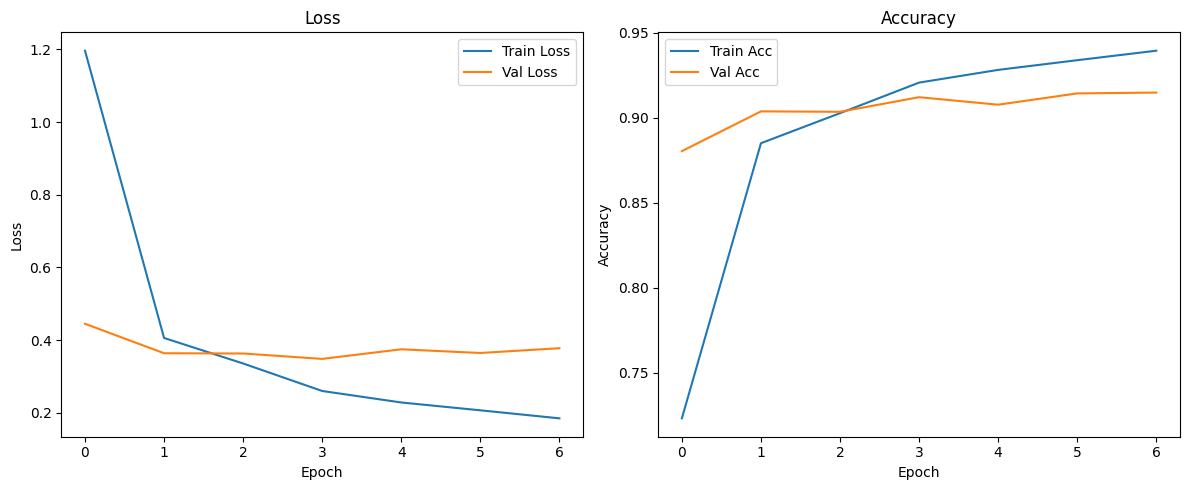

Evaluating model...


Evaluating: 100%|██████████| 169/169 [00:37<00:00,  4.45it/s]

Test Loss: 0.3793, Test Acc: 0.9127, BLEU: 0.5178


(0.3793015858751756, 0.9126934083523306, 0.5178402196487714)

In [30]:
root_dir = '/content/animal_vqa_split'

print("Preparing data...")
train_loader, val_loader, test_loader, _, _, _ = get_data_loaders(root_dir)

print("Training model...")
model = VQAPretrainedModel().to(config.DEVICE)
train_losses, val_losses, train_accs, val_accs = train_model(model, train_loader, val_loader)

print("Plotting metrics...")
plot_metrics(train_losses, val_losses, train_accs, val_accs)

print("Evaluating model...")
evaluate_model(model, test_loader)

#### ViT-Large + T5 + Transformer Fusion

In [ ]:
!pip install timm

In [ ]:
from transformers import T5Tokenizer, T5ForConditionalGeneration
import timm  # Thư viện để tải ViT

In [ ]:
# Cấu hình toàn cục
class VQAConfig:
    BATCH_SIZE = 16  # Giảm batch size vì ViT và T5 nặng
    IMAGE_SIZE = 224  # ViT yêu cầu 224x224
    MAX_QUESTION_LENGTH = 32
    MAX_ANSWER_LENGTH = 64
    DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    NUM_WORKERS = 2
    NUM_EPOCHS = 4
    LEARNING_RATE = 5e-3  # Learning rate nhỏ cho mô hình lớn

config = VQAConfig
print(f"Thiết bị sử dụng: {config.DEVICE}")

# Wikipedia API
wiki = wikipediaapi.Wikipedia(user_agent="MyVQAProject/1.0", language="en")

Thiết bị sử dụng: cuda


In [ ]:
# Model ViT + T5 + Transformer Fusion
class VQABestPretrainedModel(nn.Module):
    def __init__(self):
        super(VQABestPretrainedModel, self).__init__()

        # ViT-Large cho xử lý ảnh
        self.vit = timm.create_model('vit_large_patch16_224', pretrained=True, num_classes=0)
        self.vit_dim = 1024  # Kích thước đầu ra của ViT-Large

        # T5 cho xử lý văn bản
        self.t5_tokenizer = T5Tokenizer.from_pretrained('t5-large')
        self.t5 = T5ForConditionalGeneration.from_pretrained('t5-large')
        self.t5_dim = 1024  # Kích thước ẩn của T5-Large

        # Transformer Fusion
        self.fusion_transformer = nn.TransformerEncoder(
            nn.TransformerEncoderLayer(d_model=self.t5_dim, nhead=8, dim_feedforward=2048),
            num_layers=2
        )

        # Linear để điều chỉnh kích thước ViT về T5
        self.vit_proj = nn.Linear(self.vit_dim, self.t5_dim)

        # Freeze ViT và encoder của T5
        for param in self.vit.parameters():
            param.requires_grad = False
        for param in self.t5.encoder.parameters():
            param.requires_grad = False
        for param in self.t5.decoder.parameters():
            param.requires_grad = True

    def forward(self, images, questions, answers=None):
        # Xử lý ảnh bằng ViT
        img_feats = self.vit(images)  # [batch_size, vit_dim]
        img_feats = self.vit_proj(img_feats)  # [batch_size, t5_dim]

        # Xử lý câu hỏi bằng T5 encoder
        q_inputs = self.t5_tokenizer(questions, return_tensors='pt', padding=True, truncation=True,
                                    max_length=config.MAX_QUESTION_LENGTH).to(config.DEVICE)
        q_outputs = self.t5.encoder(**q_inputs)  # [batch_size, seq_len, t5_dim]
        q_feats = q_outputs.last_hidden_state

        # Lặp lại đặc trưng ảnh để khớp với seq_len
        img_feats = img_feats.unsqueeze(1).repeat(1, q_feats.size(1), 1)  # [batch_size, seq_len, t5_dim]

        # Kết hợp đặc trưng bằng Transformer Fusion
        combined = torch.cat((img_feats, q_feats), dim=1)  # [batch_size, seq_len + seq_len, t5_dim]
        fused_feats = self.fusion_transformer(combined)  # [batch_size, seq_len + seq_len, t5_dim]

        if answers is not None:  # Training mode
            a_inputs = self.t5_tokenizer(answers, return_tensors='pt', padding=True, truncation=True,
                                        max_length=config.MAX_ANSWER_LENGTH).to(config.DEVICE)
            outputs = self.t5(decoder_input_ids=a_inputs['input_ids'][:, :-1],
                             decoder_attention_mask=a_inputs['attention_mask'][:, :-1],
                             encoder_outputs=(fused_feats,))
            return outputs.logits
        else:  # Inference mode
            outputs = self.t5.generate(input_ids=q_inputs['input_ids'],
                                      attention_mask=q_inputs['attention_mask'],
                                      encoder_outputs=(fused_feats,),
                                      max_length=config.MAX_ANSWER_LENGTH,
                                      num_beams=4,
                                      early_stopping=True)
            return outputs

In [ ]:
# Training với Early Stopping
def train_model(model, train_loader, val_loader, patience=3):
    optimizer = torch.optim.Adam(filter(lambda p: p.requires_grad, model.parameters()), lr=config.LEARNING_RATE)
    criterion = nn.CrossEntropyLoss(ignore_index=model.t5_tokenizer.pad_token_id)

    train_losses, val_losses, train_accs, val_accs = [], [], [], []

    # Lưu tokenizer trước khi huấn luyện
    tokenizer_save_path = '/content/t5_tokenizer'
    model.t5_tokenizer.save_pretrained(tokenizer_save_path)
    print(f"Tokenizer saved to {tokenizer_save_path}")

    best_val_loss = float('inf')  # Giá trị loss tốt nhất ban đầu là vô cực
    patience_counter = 0  # Đếm số epoch không cải thiện
    best_model_path = '/content/vqa_pretrained_model_vit_t5_best.pth'  # Đường dẫn lưu mô hình tốt nhất

    for epoch in range(config.NUM_EPOCHS):
        model.train()
        t_loss, t_correct, t_total = 0, 0, 0
        for batch in tqdm(train_loader, desc=f"Epoch {epoch+1} Train"):
            images = batch['image'].to(config.DEVICE)
            questions = batch['question']
            answers = batch['answer']

            optimizer.zero_grad()
            outputs = model(images, questions, answers)
            loss = criterion(outputs.view(-1, model.t5.config.vocab_size),
                           model.t5_tokenizer(answers, return_tensors='pt', padding=True,
                                             truncation=True, max_length=config.MAX_ANSWER_LENGTH)
                           .input_ids[:, 1:].reshape(-1).to(config.DEVICE))
            loss.backward()
            optimizer.step()

            t_loss += loss.item() * images.size(0)
            preds = outputs.argmax(dim=-1)
            targets = model.t5_tokenizer(answers, return_tensors='pt', padding=True,
                                        truncation=True, max_length=config.MAX_ANSWER_LENGTH).input_ids[:, 1:].to(config.DEVICE)
            t_correct += (preds == targets).float().sum().item()
            t_total += targets.ne(model.t5_tokenizer.pad_token_id).sum().item()

        train_losses.append(t_loss / len(train_loader.dataset))
        train_accs.append(t_correct / t_total)

        model.eval()
        v_loss, v_correct, v_total = 0, 0, 0
        with torch.no_grad():
            for batch in tqdm(val_loader, desc=f"Epoch {epoch+1} Val"):
                images = batch['image'].to(config.DEVICE)
                questions = batch['question']
                answers = batch['answer']

                outputs = model(images, questions, answers)
                loss = criterion(outputs.view(-1, model.t5.config.vocab_size),
                               model.t5_tokenizer(answers, return_tensors='pt', padding=True,
                                                 truncation=True, max_length=config.MAX_ANSWER_LENGTH)
                               .input_ids[:, 1:].reshape(-1).to(config.DEVICE))

                v_loss += loss.item() * images.size(0)
                preds = outputs.argmax(dim=-1)
                targets = model.t5_tokenizer(answers, return_tensors='pt', padding=True,
                                            truncation=True, max_length=config.MAX_ANSWER_LENGTH).input_ids[:, 1:].to(config.DEVICE)
                v_correct += (preds == targets).float().sum().item()
                v_total += targets.ne(model.t5_tokenizer.pad_token_id).sum().item()

        val_losses.append(v_loss / len(val_loader.dataset))
        val_accs.append(v_correct / v_total)

        print(f"Epoch {epoch+1}: Train Loss: {train_losses[-1]:.4f}, Train Acc: {train_accs[-1]:.4f}, "
              f"Val Loss: {val_losses[-1]:.4f}, Val Acc: {val_accs[-1]:.4f}")

        # Early stopping logic
        current_val_loss = val_losses[-1]
        if current_val_loss < best_val_loss:
            best_val_loss = current_val_loss
            patience_counter = 0  # Reset bộ đếm nếu có cải thiện
            # Lưu mô hình tốt nhất
            torch.save(model.state_dict(), best_model_path)
            print(f"Best model saved to {best_model_path} with Val Loss: {best_val_loss:.4f}")
        else:
            patience_counter += 1
            print(f"No improvement in validation loss. Patience: {patience_counter}/{patience}")

        # Dừng nếu vượt quá patience
        if patience_counter >= patience:
            print(f"Early stopping triggered after {epoch+1} epochs!")
            break

    # Lưu mô hình cuối cùng (nếu muốn giữ cả phiên bản cuối)
    final_model_path = '/content/vqa_pretrained_model_vit_t5_final.pth'
    torch.save(model.state_dict(), final_model_path)
    print(f"Final model saved to {final_model_path}")

    return train_losses, val_losses, train_accs, val_accs

In [ ]:
# Evaluation
def evaluate_model(model, test_loader):
    model.eval()
    criterion = nn.CrossEntropyLoss(ignore_index=model.t5_tokenizer.pad_token_id)
    t_loss, t_correct, t_total, bleu_scores = 0, 0, 0, []

    with torch.no_grad():
        for batch in tqdm(test_loader, desc="Evaluating"):
            images = batch['image'].to(config.DEVICE)
            questions = batch['question']
            answers = batch['answer']

            outputs = model(images, questions, answers)
            loss = criterion(outputs.view(-1, model.t5.config.vocab_size),
                           model.t5_tokenizer(answers, return_tensors='pt', padding=True,
                                             truncation=True, max_length=config.MAX_ANSWER_LENGTH)
                           .input_ids[:, 1:].reshape(-1).to(config.DEVICE))

            t_loss += loss.item() * images.size(0)
            preds = outputs.argmax(dim=-1)
            targets = model.t5_tokenizer(answers, return_tensors='pt', padding=True,
                                        truncation=True, max_length=config.MAX_ANSWER_LENGTH).input_ids[:, 1:].to(config.DEVICE)
            t_correct += (preds == targets).float().sum().item()
            t_total += targets.ne(model.t5_tokenizer.pad_token_id).sum().item()

            for i in range(len(answers)):
                pred_text = model.t5_tokenizer.decode(preds[i], skip_special_tokens=True)
                bleu_scores.append(sentence_bleu([answers[i].lower().split()], pred_text.lower().split(),
                                               smoothing_function=SmoothingFunction().method1))

    t_loss /= len(test_loader.dataset)
    t_acc = t_correct / t_total
    avg_bleu = sum(bleu_scores) / len(bleu_scores)
    print(f"Test Loss: {t_loss:.4f}, Test Acc: {t_acc:.4f}, BLEU: {avg_bleu:.4f}")
    return t_loss, t_acc, avg_bleu

In [ ]:
root_dir = '/content/animal_vqa_split'

# Chuẩn bị dữ liệu
print("Preparing data...")
train_loader, val_loader, test_loader, train_dataset, val_dataset, test_dataset = get_data_loaders(root_dir)

# Khởi tạo và huấn luyện mô hình
print("Training model...")
model = VQABestPretrainedModel().to(config.DEVICE)
train_losses, val_losses, train_accs, val_accs = train_model(model, train_loader, val_loader)

print("Plotting metrics...")
plot_metrics(train_losses, val_losses, train_accs, val_accs)

print("Evaluating model...")
evaluate_model(model, test_loader)

Preparing data...
Training model...


model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565


model.safetensors:   0%|          | 0.00/2.95G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

/usr/local/lib/python3.11/dist-packages/torch/nn/modules/transformer.py:385: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(


Tokenizer saved to /content/t5_tokenizer


Epoch 1 Val: 100%|██████████| 169/169 [01:58<00:00,  1.43it/s]


Epoch 1: Train Loss: 3.7778, Train Acc: 0.2346, Val Loss: 3.1754, Val Acc: 0.3151
Best model saved to /content/vqa_pretrained_model_vit_t5_best.pth with Val Loss: 3.1754


Epoch 2 Val: 100%|██████████| 169/169 [01:55<00:00,  1.46it/s]


Epoch 2: Train Loss: nan, Train Acc: 0.6424, Val Loss: nan, Val Acc: 1.4106
No improvement in validation loss. Patience: 1/3


Epoch 3 Val: 100%|██████████| 169/169 [01:55<00:00,  1.47it/s]


Epoch 3: Train Loss: nan, Train Acc: 1.3757, Val Loss: nan, Val Acc: 1.4106
No improvement in validation loss. Patience: 2/3


Epoch 4 Val: 100%|██████████| 169/169 [01:55<00:00,  1.47it/s]


Epoch 4: Train Loss: nan, Train Acc: 1.3867, Val Loss: nan, Val Acc: 1.4106
No improvement in validation loss. Patience: 3/3
Early stopping triggered after 4 epochs!
Final model saved to /content/vqa_pretrained_model_vit_t5_final.pth
Plotting metrics...


NameError: name 'plot_metrics' is not defined

In [ ]:
import torch

def run_evaluation():
    # Thiết lập device
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    # Load test data
    root_dir = '/content/animal_vqa_split'
    print("Preparing test data...")
    _, _, test_loader, _, _, _ = get_data_loaders(root_dir)

    # Load model
    print("Loading model...")
    model_path = '/content/vqa_pretrained_model_vit_t5_best.pth'
    model = VQABestPretrainedModel().to(device)
    checkpoint = torch.load(model_path, map_location=device)

    # Kiểm tra và load state_dict
    if isinstance(checkpoint, dict) and 'state_dict' in checkpoint:
        model.load_state_dict(checkpoint['state_dict'])
    else:
        model.load_state_dict(checkpoint)

    # Load metrics nếu có trong checkpoint
    if 'train_losses' in checkpoint:
        train_losses = checkpoint['train_losses']
        val_losses = checkpoint['val_losses']
        train_accs = checkpoint['train_accs']
        val_accs = checkpoint['val_accs']

        print("Plotting metrics...")
        plot_metrics(train_losses, val_losses, train_accs, val_accs)
    else:
        print("No metrics found in checkpoint, skipping plotting...")

    # Đánh giá model
    print("Evaluating model...")
    evaluate_model(model, test_loader)

# Chạy chương trình
if __name__ == "__main__":
    run_evaluation()

Preparing test data...
Loading model...


/usr/local/lib/python3.11/dist-packages/torch/nn/modules/transformer.py:385: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(


OutOfMemoryError: CUDA out of memory. Tried to allocate 20.00 MiB. GPU 0 has a total capacity of 14.74 GiB of which 4.12 MiB is free. Process 10296 has 14.73 GiB memory in use. Of the allocated memory 14.58 GiB is allocated by PyTorch, and 18.89 MiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True to avoid fragmentation.  See documentation for Memory Management  (https://pytorch.org/docs/stable/notes/cuda.html#environment-variables)

### Model Summary

In [ ]:
!pip install torchinfo

In [ ]:
import torch
import torch.nn as nn
from torchvision import models
from transformers import BartTokenizer, BartForConditionalGeneration, T5Tokenizer, T5ForConditionalGeneration
import timm
from torchinfo import summary

In [ ]:
# Cấu hình toàn cục
class VQAConfig:
    DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    IMAGE_SIZE = {'CNN': 128, 'ResNet': 224, 'ViT': 224}
    HIDDEN_SIZE = 256  # Cho CNN + LSTM

config = VQAConfig
print(f"Thiết bị sử dụng: {config.DEVICE}")

# 1. CNN + LSTM Model
class VQACNNLSTM(nn.Module):
    def __init__(self, question_vocab_size=1000, answer_vocab_size=1000, hidden_size=config.HIDDEN_SIZE):
        super(VQACNNLSTM, self).__init__()
        self.cnn = nn.Sequential(
            nn.Conv2d(3, 32, 3, padding=1), nn.ReLU(), nn.MaxPool2d(2),
            nn.Conv2d(32, 64, 3, padding=1), nn.ReLU(), nn.MaxPool2d(2),
            nn.Conv2d(64, 128, 3, padding=1), nn.ReLU(), nn.MaxPool2d(2)
        )
        self.cnn_fc = nn.Linear(128 * (config.IMAGE_SIZE['CNN'] // 8) ** 2, hidden_size)
        self.q_embed = nn.Embedding(question_vocab_size, hidden_size)
        self.q_lstm = nn.LSTM(hidden_size, hidden_size, batch_first=True)
        self.combined_fc = nn.Linear(hidden_size * 2, hidden_size)
        self.a_embed = nn.Embedding(answer_vocab_size, hidden_size)
        self.a_lstm = nn.LSTM(hidden_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, answer_vocab_size)

    def forward(self, images, questions, answers=None):
        img_feats = self.cnn(images).view(images.size(0), -1)
        img_feats = self.cnn_fc(img_feats)
        q_embed = self.q_embed(questions)
        q_out, _ = self.q_lstm(q_embed)
        q_out = q_out[:, -1, :]
        combined = torch.cat((img_feats, q_out), dim=1)
        combined = self.combined_fc(combined).unsqueeze(1)
        if answers is not None:
            a_embed = self.a_embed(answers[:, :-1])
            combined = combined.repeat(1, a_embed.size(1), 1)
            a_out, _ = self.a_lstm(a_embed + combined)
            return self.fc(a_out)
        return None

# 2. ResNet18 + BART + MLP Fusion Model
class VQAPretrainedModel(nn.Module):
    def __init__(self):
        super(VQAPretrainedModel, self).__init__()
        self.resnet = models.resnet18(weights=models.ResNet18_Weights.IMAGENET1K_V1)
        self.resnet.fc = nn.Identity()
        self.bart_tokenizer = BartTokenizer.from_pretrained('facebook/bart-base')
        self.bart = BartForConditionalGeneration.from_pretrained('facebook/bart-base')
        self.fusion_mlp = nn.Sequential(
            nn.Linear(512 + 768, 512),  # 512 từ ResNet18, 768 từ BART
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(512, 768)
        )
        for param in self.resnet.parameters():
            param.requires_grad = False
        for param in self.bart.model.encoder.parameters():
            param.requires_grad = False
        for param in self.bart.model.decoder.parameters():
            param.requires_grad = True

    def forward(self, images, question_ids, answer_ids=None):
        img_feats = self.resnet(images)
        q_outputs = self.bart.model.encoder(input_ids=question_ids)
        q_feats = q_outputs.last_hidden_state
        img_feats = img_feats.unsqueeze(1).repeat(1, q_feats.size(1), 1)
        combined = torch.cat((img_feats, q_feats), dim=2)
        fused_feats = self.fusion_mlp(combined)
        if answer_ids is not None:
            outputs = self.bart(decoder_input_ids=answer_ids[:, :-1], encoder_outputs=(fused_feats,))
            return outputs.logits
        return None

# 3. ViT-Large + T5 + Transformer Fusion Model
class VQABestPretrainedModel(nn.Module):
    def __init__(self):
        super(VQABestPretrainedModel, self).__init__()
        self.vit = timm.create_model('vit_large_patch16_224', pretrained=True, num_classes=0)
        self.vit_dim = 1024
        self.t5_tokenizer = T5Tokenizer.from_pretrained('t5-base')
        self.t5 = T5ForConditionalGeneration.from_pretrained('t5-base')
        self.t5_dim = 768  # t5-base có hidden size 768
        self.fusion_transformer = nn.TransformerEncoder(
            nn.TransformerEncoderLayer(d_model=self.t5_dim, nhead=8, dim_feedforward=2048),
            num_layers=2
        )
        self.vit_proj = nn.Linear(self.vit_dim, self.t5_dim)
        for param in self.vit.parameters():
            param.requires_grad = False
        for param in self.t5.encoder.parameters():
            param.requires_grad = False
        for param in self.t5.decoder.parameters():
            param.requires_grad = True

    def forward(self, images, question_ids, answer_ids=None):
        img_feats = self.vit(images)
        img_feats = self.vit_proj(img_feats)
        q_outputs = self.t5.encoder(input_ids=question_ids)
        q_feats = q_outputs.last_hidden_state
        img_feats = img_feats.unsqueeze(1).repeat(1, q_feats.size(1), 1)
        combined = torch.cat((img_feats, q_feats), dim=1)
        fused_feats = self.fusion_transformer(combined)
        if answer_ids is not None:
            outputs = self.t5(decoder_input_ids=answer_ids[:, :-1], encoder_outputs=(fused_feats,))
            return outputs.logits
        return None

# Hàm hiển thị thông tin mô hình
def print_model_summary():
    print("=== Model Summary ===")

    # 1. CNN + LSTM
    cnn_lstm = VQACNNLSTM().to(config.DEVICE)
    print("\n1. CNN + LSTM")
    summary(cnn_lstm,
            input_size=[(1, 3, config.IMAGE_SIZE['CNN'], config.IMAGE_SIZE['CNN']),
                        (1, 32),  # questions
                        (1, 64)],  # answers
            dtypes=[torch.float, torch.long, torch.long],
            col_names=("input_size", "output_size", "num_params", "trainable"),
            col_width=20,
            depth=3,
            verbose=1,
            device=str(config.DEVICE))

    # 2. ResNet18 + BART + MLP Fusion
    resnet_bart = VQAPretrainedModel().to(config.DEVICE)
    print("\n2. ResNet18 + BART + MLP Fusion")
    batch_size = 1
    dummy_images = torch.randn(batch_size, 3, config.IMAGE_SIZE['ResNet'], config.IMAGE_SIZE['ResNet']).to(config.DEVICE)
    dummy_questions = ["What is this animal?"] * batch_size
    dummy_answers = ["This is a cat."] * batch_size
    q_inputs = resnet_bart.bart_tokenizer(dummy_questions, return_tensors='pt', padding=True, truncation=True, max_length=32).to(config.DEVICE)
    a_inputs = resnet_bart.bart_tokenizer(dummy_answers, return_tensors='pt', padding=True, truncation=True, max_length=64).to(config.DEVICE)
    summary(resnet_bart,
            input_size=[(batch_size, 3, config.IMAGE_SIZE['ResNet'], config.IMAGE_SIZE['ResNet']),
                        q_inputs['input_ids'].shape,  # Truyền tensor đã token hóa
                        a_inputs['input_ids'].shape],
            dtypes=[torch.float, torch.long, torch.long],
            col_names=("input_size", "output_size", "num_params", "trainable"),
            col_width=20,
            depth=3,
            verbose=1,
            device=str(config.DEVICE))

    # 3. ViT-Large + T5 + Transformer Fusion
    vit_t5 = VQABestPretrainedModel().to(config.DEVICE)
    print("\n3. ViT-Large + T5 + Transformer Fusion")
    q_inputs_t5 = vit_t5.t5_tokenizer(dummy_questions, return_tensors='pt', padding=True, truncation=True, max_length=32).to(config.DEVICE)
    a_inputs_t5 = vit_t5.t5_tokenizer(dummy_answers, return_tensors='pt', padding=True, truncation=True, max_length=64).to(config.DEVICE)
    summary(vit_t5,
            input_size=[(batch_size, 3, config.IMAGE_SIZE['ViT'], config.IMAGE_SIZE['ViT']),
                        q_inputs_t5['input_ids'].shape,
                        a_inputs_t5['input_ids'].shape],
            dtypes=[torch.float, torch.long, torch.long],
            col_names=("input_size", "output_size", "num_params", "trainable"),
            col_width=20,
            depth=3,
            verbose=1,
            device=str(config.DEVICE))

# Gọi hàm để in thông tin
print_model_summary()

Thiết bị sử dụng: cuda
=== Model Summary ===

1. CNN + LSTM
Layer (type:depth-idx)                   Input Shape          Output Shape         Param #              Trainable
VQACNNLSTM                               [1, 3, 128, 128]     [1, 63, 1000]        --                   True
├─Sequential: 1-1                        [1, 3, 128, 128]     [1, 128, 16, 16]     --                   True
│    └─Conv2d: 2-1                       [1, 3, 128, 128]     [1, 32, 128, 128]    896                  True
│    └─ReLU: 2-2                         [1, 32, 128, 128]    [1, 32, 128, 128]    --                   --
│    └─MaxPool2d: 2-3                    [1, 32, 128, 128]    [1, 32, 64, 64]      --                   --
│    └─Conv2d: 2-4                       [1, 32, 64, 64]      [1, 64, 64, 64]      18,496               True
│    └─ReLU: 2-5                         [1, 64, 64, 64]      [1, 64, 64, 64]      --                   --
│    └─MaxPool2d: 2-6                    [1, 64, 64, 64]      [1, 64,

model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565


model.safetensors:   0%|          | 0.00/892M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

/usr/local/lib/python3.11/dist-packages/torch/nn/modules/transformer.py:385: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(



3. ViT-Large + T5 + Transformer Fusion


Passing a tuple of `past_key_values` is deprecated and will be removed in Transformers v4.48.0. You should pass an instance of `EncoderDecoderCache` instead, e.g. `past_key_values=EncoderDecoderCache.from_legacy_cache(past_key_values)`.


Layer (type:depth-idx)                                       Input Shape          Output Shape         Param #              Trainable
VQABestPretrainedModel                                       [1, 3, 224, 224]     [1, 6, 32128]        --                   Partial
├─VisionTransformer: 1-1                                     [1, 3, 224, 224]     [1, 1024]            202,752              False
│    └─PatchEmbed: 2-1                                       [1, 3, 224, 224]     [1, 196, 1024]       --                   False
│    │    └─Conv2d: 3-1                                      [1, 3, 224, 224]     [1, 1024, 14, 14]    (787,456)            False
│    │    └─Identity: 3-2                                    [1, 196, 1024]       [1, 196, 1024]       --                   --
│    └─Dropout: 2-2                                          [1, 197, 1024]       [1, 197, 1024]       --                   --
│    └─Identity: 2-3                                         [1, 197, 1024]       [1, 197,